In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import time

# Setup Selenium
chrome_options = Options()
chrome_options.add_argument("--start-maximized")
service = Service()

driver = webdriver.Chrome(service=service, options=chrome_options)

# Open the first Daft.ie rentals page
driver.get('https://www.daft.ie/property-for-rent/ireland/apartments')
time.sleep(5)  # Let the page load

In [3]:
# Get all listing links from the page
listing_elements = driver.find_elements(By.CSS_SELECTOR, 'li[data-testid^="result-"] a')
listing_urls = [el.get_attribute('href') for el in listing_elements if el.get_attribute('href')]

print(f"Found {len(listing_urls)} listings.")
print(listing_urls)

Found 65 listings.
['https://www.daft.ie/for-rent/alta-verde-blackrock-cross-avenue-blackrock-co-dublin/6117164', 'https://www.daft.ie/for-rent/apartment-1-bedroom-alta-verde-cross-avenue-blackrock-co-dublin/6117168', 'https://www.daft.ie/for-rent/apartment-2-bedroom-alta-verde-cross-avenue-blackrock-co-dublin/6117162', 'https://www.daft.ie/for-rent/point-campus-dublin-dublin-2/5998645', 'https://www.daft.ie/for-rent/brickfield-square-brickfield-drive/5718274', 'https://www.daft.ie/for-rent/apartment-1-bed-brickfield-square-brickfield-drive-dublin-12/5730448', 'https://www.daft.ie/for-rent/apartment-2-bed-brickfield-square-brickfield-drive-dublin-12/5730172', 'https://www.daft.ie/for-rent/ocallaghan-court-erne-street-upper-dublin-2/2929969', 'https://www.daft.ie/for-rent/apartment-1-bedroom-apartment-ocallaghan-court-erne-street-upper-dublin-2/2929971', 'https://www.daft.ie/for-rent/griffith-wood-griffith-avenue-drumcondra-dublin-9/3523580', 'https://www.daft.ie/for-rent/apartment-1-be

In [4]:
# Test scraping the first listing
test_url = listing_urls[0]
print(f"Scraping: {test_url}")

driver.get(test_url)
time.sleep(5)  # Give it time to load

# Scrape address
try:
    address = driver.find_element(By.CSS_SELECTOR, 'h1[data-testid="address"]').text.strip()
except:
    address = 'Address Not Found'

# Scrape price
try:
    price = driver.find_element(By.CSS_SELECTOR, 'p[class*="PriceText"]').text.strip()
except:
    price = 'Price Not Found'

# Scrape bedrooms
try:
    bedrooms = driver.find_element(By.XPATH, '//span[contains(text(),"Bed")]').text.strip()
except:
    bedrooms = 'Bedrooms Not Found'

# Scrape bathrooms
try:
    bathrooms = driver.find_element(By.XPATH, '//span[contains(text(),"Bath")]').text.strip()
except:
    bathrooms = 'Bathrooms Not Found'

# Scrape BER Rating
try:
    ber = driver.find_element(By.CSS_SELECTOR, 'div[data-testid="ber-rating"]').text.strip()
except:
    ber = 'BER Not Found'

# Scrape amenities
try:
    amenities_elements = driver.find_elements(By.CSS_SELECTOR, 'ul[data-testid="features"] li')
    amenities = ', '.join([a.text.strip() for a in amenities_elements])
except:
    amenities = 'Amenities Not Found'

# Show the results
print(f"Address: {address}")
print(f"Price: {price}")
print(f"Bedrooms: {bedrooms}")
print(f"Bathrooms: {bathrooms}")
print(f"BER Rating: {ber}")
print(f"Amenities: {amenities}")

Scraping: https://www.daft.ie/for-rent/alta-verde-blackrock-cross-avenue-blackrock-co-dublin/6117164
Address: Address Not Found
Price: Price Not Found
Bedrooms: 1 Bed
Bathrooms: 1 Bath
BER Rating: BER Not Found
Amenities: 


In [5]:
for test_url in listing_urls[:4]:
    print(f"\nScraping: {test_url}")
    driver.get(test_url)
    time.sleep(5)  # Allow the page to fully load

    # Scrape address
    try:
        address = driver.find_element(By.CSS_SELECTOR, 'h1[data-testid="address"]').text.strip()
    except:
        address = 'Address Not Found'

    # Scrape price
    try:
        price = driver.find_element(By.CSS_SELECTOR, 'p[class*="PriceText"]').text.strip()
    except:
        price = 'Price Not Found'

    # Scrape bedrooms
    try:
        bedrooms = driver.find_element(By.XPATH, '//span[contains(text(),"Bed")]').text.strip()
    except:
        bedrooms = 'Bedrooms Not Found'

    # Scrape bathrooms
    try:
        bathrooms = driver.find_element(By.XPATH, '//span[contains(text(),"Bath")]').text.strip()
    except:
        bathrooms = 'Bathrooms Not Found'

    # Scrape BER Rating
    try:
        ber = driver.find_element(By.CSS_SELECTOR, 'div[data-testid="ber-rating"]').text.strip()
    except:
        ber = 'BER Not Found'

    # Scrape amenities
    try:
        amenities_elements = driver.find_elements(By.CSS_SELECTOR, 'ul[data-testid="features"] li')
        amenities = ', '.join([a.text.strip() for a in amenities_elements])
    except:
        amenities = 'Amenities Not Found'

    # Show the results
    print(f"Address: {address}")
    print(f"Price: {price}")
    print(f"Bedrooms: {bedrooms}")
    print(f"Bathrooms: {bathrooms}")
    print(f"BER Rating: {ber}")
    print(f"Amenities: {amenities}")


Scraping: https://www.daft.ie/for-rent/alta-verde-blackrock-cross-avenue-blackrock-co-dublin/6117164
Address: Address Not Found
Price: Price Not Found
Bedrooms: 1 Bed
Bathrooms: 1 Bath
BER Rating: BER Not Found
Amenities: 

Scraping: https://www.daft.ie/for-rent/apartment-1-bedroom-alta-verde-cross-avenue-blackrock-co-dublin/6117168
Address: 1 Bedroom , Alta Verde, Cross Avenue, Blackrock, Co. Dublin
Price: Price Not Found
Bedrooms: 1 Bed
Bathrooms: 1 Bath
BER Rating: BER Not Found
Amenities: 

Scraping: https://www.daft.ie/for-rent/apartment-2-bedroom-alta-verde-cross-avenue-blackrock-co-dublin/6117162
Address: 2 Bedroom, Alta Verde, Cross Avenue, Blackrock, Co. Dublin
Price: Price Not Found
Bedrooms: 2 Bed
Bathrooms: 2 Bath
BER Rating: BER Not Found
Amenities: 

Scraping: https://www.daft.ie/for-rent/point-campus-dublin-dublin-2/5998645
Address: Address Not Found
Price: Price Not Found
Bedrooms: Bedrooms Not Found
Bathrooms: Bathrooms Not Found
BER Rating: BER Not Found
Amenities: 


In [6]:
for test_url in listing_urls[:4]:
    print(f"\nScraping: {test_url}")
    driver.get(test_url)
    time.sleep(5)

    # Scrape address
    try:
        address = driver.find_element(By.CSS_SELECTOR, 'h1[data-testid="address"]').text.strip()
    except:
        address = 'Address Not Found'

    # Scrape price (new XPATH)
    try:
        price = driver.find_element(By.XPATH, '//p[contains(text(),"per month")]').text.strip()
    except:
        price = 'Price Not Found'

    # Scrape bedrooms
    try:
        bedrooms = driver.find_element(By.XPATH, '//span[contains(text(),"Bed")]').text.strip()
    except:
        bedrooms = 'Bedrooms Not Found'

    # Scrape bathrooms
    try:
        bathrooms = driver.find_element(By.XPATH, '//span[contains(text(),"Bath")]').text.strip()
    except:
        bathrooms = 'Bathrooms Not Found'

    # Scrape BER Rating
    try:
        ber = driver.find_element(By.CSS_SELECTOR, 'div[data-testid="ber-rating"]').text.strip()
    except:
        ber = 'BER Not Found'

    # Scrape amenities
    try:
        amenities_elements = driver.find_elements(By.CSS_SELECTOR, 'ul[data-testid="features"] li')
        amenities = ', '.join([a.text.strip() for a in amenities_elements])
    except:
        amenities = 'Amenities Not Found'

    # Show the results
    print(f"Address: {address}")
    print(f"Price: {price}")
    print(f"Bedrooms: {bedrooms}")
    print(f"Bathrooms: {bathrooms}")
    print(f"BER Rating: {ber}")
    print(f"Amenities: {amenities}")


Scraping: https://www.daft.ie/for-rent/alta-verde-blackrock-cross-avenue-blackrock-co-dublin/6117164
Address: Address Not Found
Price: €2,195 per month
Bedrooms: 1 Bed
Bathrooms: 1 Bath
BER Rating: BER Not Found
Amenities: 

Scraping: https://www.daft.ie/for-rent/apartment-1-bedroom-alta-verde-cross-avenue-blackrock-co-dublin/6117168
Address: 1 Bedroom , Alta Verde, Cross Avenue, Blackrock, Co. Dublin
Price: €2,199 per month
Bedrooms: 1 Bed
Bathrooms: 1 Bath
BER Rating: BER Not Found
Amenities: 

Scraping: https://www.daft.ie/for-rent/apartment-2-bedroom-alta-verde-cross-avenue-blackrock-co-dublin/6117162
Address: 2 Bedroom, Alta Verde, Cross Avenue, Blackrock, Co. Dublin
Price: €2,900 per month
Bedrooms: 2 Bed
Bathrooms: 2 Bath
BER Rating: BER Not Found
Amenities: 

Scraping: https://www.daft.ie/for-rent/point-campus-dublin-dublin-2/5998645
Address: Address Not Found
Price: Price Not Found
Bedrooms: Bedrooms Not Found
Bathrooms: Bathrooms Not Found
BER Rating: BER Not Found
Amenities

In [7]:
for test_url in listing_urls[:4]:
    print(f"\nScraping: {test_url}")
    driver.get(test_url)
    time.sleep(5)

    # Scrape address
    try:
        address = driver.find_element(By.CSS_SELECTOR, 'h1[data-testid="address"]').text.strip()
    except:
        address = 'Address Not Found'

    # Scrape price
    try:
        price = driver.find_element(By.XPATH, '//p[contains(text(),"per month")]').text.strip()
    except:
        price = 'Price Not Found'

    # Scrape bedrooms
    try:
        bedrooms = driver.find_element(By.XPATH, '//span[contains(text(),"Bed")]').text.strip()
    except:
        bedrooms = 'Bedrooms Not Found'

    # Scrape bathrooms
    try:
        bathrooms = driver.find_element(By.XPATH, '//span[contains(text(),"Bath")]').text.strip()
    except:
        bathrooms = 'Bathrooms Not Found'

    # Scrape BER Rating using alternate method
    try:
        ber = driver.find_element(By.XPATH, '//div[contains(@aria-label, "BER")]').get_attribute('aria-label')
    except:
        ber = 'BER Not Found'

    # Scrape amenities using backup strategy
    try:
        amenities_elements = driver.find_elements(By.XPATH, '//ul[@data-testid="features"]/li')
        amenities = ', '.join([a.text.strip() for a in amenities_elements]) if amenities_elements else 'Amenities Not Found'
    except:
        amenities = 'Amenities Not Found'

    # Show the results
    print(f"Address: {address}")
    print(f"Price: {price}")
    print(f"Bedrooms: {bedrooms}")
    print(f"Bathrooms: {bathrooms}")
    print(f"BER Rating: {ber}")
    print(f"Amenities: {amenities}")


Scraping: https://www.daft.ie/for-rent/alta-verde-blackrock-cross-avenue-blackrock-co-dublin/6117164
Address: Address Not Found
Price: €2,195 per month
Bedrooms: 1 Bed
Bathrooms: 1 Bath
BER Rating: BER A2A3
Amenities: Amenities Not Found

Scraping: https://www.daft.ie/for-rent/apartment-1-bedroom-alta-verde-cross-avenue-blackrock-co-dublin/6117168
Address: 1 Bedroom , Alta Verde, Cross Avenue, Blackrock, Co. Dublin
Price: €2,199 per month
Bedrooms: 1 Bed
Bathrooms: 1 Bath
BER Rating: BER A2
Amenities: Amenities Not Found

Scraping: https://www.daft.ie/for-rent/apartment-2-bedroom-alta-verde-cross-avenue-blackrock-co-dublin/6117162
Address: 2 Bedroom, Alta Verde, Cross Avenue, Blackrock, Co. Dublin
Price: €2,900 per month
Bedrooms: 2 Bed
Bathrooms: 2 Bath
BER Rating: BER A2
Amenities: Amenities Not Found

Scraping: https://www.daft.ie/for-rent/point-campus-dublin-dublin-2/5998645
Address: Address Not Found
Price: Price Not Found
Bedrooms: Bedrooms Not Found
Bathrooms: Bathrooms Not Fou

In [8]:
for test_url in listing_urls[:4]:
    print(f"\nScraping: {test_url}")
    driver.get(test_url)
    time.sleep(5)

    # Scrape address
    try:
        address = driver.find_element(By.CSS_SELECTOR, 'h1[data-testid="address"]').text.strip()
    except:
        address = 'Address Not Found'

    # Price Extraction
try:
    price_tag = listing_soup.find('p', string=lambda text: text and '€' in text)
    price = price_tag.text.strip() if price_tag else 'Price Not Found'
except:
    price = 'Price Not Found'

    # Scrape bedrooms
    try:
        bedrooms = driver.find_element(By.XPATH, '//span[contains(text(),"Bed")]').text.strip()
    except:
        bedrooms = 'Bedrooms Not Found'

    # Scrape bathrooms
    try:
        bathrooms = driver.find_element(By.XPATH, '//span[contains(text(),"Bath")]').text.strip()
    except:
        bathrooms = 'Bathrooms Not Found'

    # Scrape BER Rating using alternate method
    try:
        ber = driver.find_element(By.XPATH, '//div[contains(@aria-label, "BER")]').get_attribute('aria-label')
    except:
        ber = 'BER Not Found'

    # Scrape amenities using backup strategy
    try:
        amenities_elements = driver.find_elements(By.XPATH, '//ul[@data-testid="features"]/li')
        amenities = ', '.join([a.text.strip() for a in amenities_elements]) if amenities_elements else 'Amenities Not Found'
    except:
        amenities = 'Amenities Not Found'

    # Show the results
    print(f"Address: {address}")
    print(f"Price: {price}")
    print(f"Bedrooms: {bedrooms}")
    print(f"Bathrooms: {bathrooms}")
    print(f"BER Rating: {ber}")
    print(f"Amenities: {amenities}")


Scraping: https://www.daft.ie/for-rent/alta-verde-blackrock-cross-avenue-blackrock-co-dublin/6117164

Scraping: https://www.daft.ie/for-rent/apartment-1-bedroom-alta-verde-cross-avenue-blackrock-co-dublin/6117168

Scraping: https://www.daft.ie/for-rent/apartment-2-bedroom-alta-verde-cross-avenue-blackrock-co-dublin/6117162

Scraping: https://www.daft.ie/for-rent/point-campus-dublin-dublin-2/5998645
Address: Address Not Found
Price: Price Not Found
Bedrooms: Bedrooms Not Found
Bathrooms: Bathrooms Not Found
BER Rating: BER NA
Amenities: Amenities Not Found


In [9]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import pandas as pd

In [10]:
driver = webdriver.Chrome()

In [11]:
base_url = 'https://www.daft.ie'
listing_urls = []

page = 1
while len(listing_urls) < 10:
    print(f"Scraping page {page}...")
    driver.get(f'https://www.daft.ie/property-for-rent/dublin?page={page}')
    time.sleep(5)

    listings = driver.find_elements(By.CSS_SELECTOR, 'a[href*="/for-rent/"]')
    for listing in listings:
        url = listing.get_attribute('href')
        if url and url not in listing_urls:
            listing_urls.append(url)
        if len(listing_urls) == 10:
            break

    page += 1

print(f"\nCollected {len(listing_urls)} listings for testing.")

Scraping page 1...

Collected 10 listings for testing.


In [12]:
test_data = []

for test_url in listing_urls:
    print(f"\nScraping: {test_url}")
    driver.get(test_url)
    time.sleep(5)

    # Scrape address
    try:
        address = driver.find_element(By.CSS_SELECTOR, 'h1[data-testid="address"]').text.strip()
    except:
        address = 'Address Not Found'

    # Scrape price
    try:
        price = driver.find_element(By.XPATH, '//p[contains(text(),"per month")]').text.strip()
    except:
        price = 'Price Not Found'

    # Scrape bedrooms
    try:
        bedrooms = driver.find_element(By.XPATH, '//span[contains(text(),"Bed")]').text.strip()
    except:
        bedrooms = 'Bedrooms Not Found'

    # Scrape bathrooms
    try:
        bathrooms = driver.find_element(By.XPATH, '//span[contains(text(),"Bath")]').text.strip()
    except:
        bathrooms = 'Bathrooms Not Found'

    # Scrape BER Rating
    try:
        ber = driver.find_element(By.XPATH, '//div[contains(@aria-label, "BER")]').get_attribute('aria-label')
    except:
        ber = 'BER Not Found'

    # Scrape amenities
    try:
        amenities_elements = driver.find_elements(By.XPATH, '//ul[@data-testid="features"]/li')
        amenities = ', '.join([a.text.strip() for a in amenities_elements]) if amenities_elements else 'Amenities Not Found'
    except:
        amenities = 'Amenities Not Found'

    # Save the result
    test_data.append({
        'URL': test_url,
        'Address': address,
        'Price': price,
        'Bedrooms': bedrooms,
        'Bathrooms': bathrooms,
        'BER Rating': ber,
        'Amenities': amenities
    })


Scraping: https://www.daft.ie/for-rent/grand-canal-harbour-grand-canal-place-dublin-8-grand-canal-harbour-grand-canal-place-dublin-8-dublin-8/5577193

Scraping: https://www.daft.ie/for-rent/apartment-1-bed-twin-bedroom-grand-canal-harbour-grand-canal-place-dublin-8/5810496

Scraping: https://www.daft.ie/for-rent/apartment-1-bed-grand-canal-harbour-grand-canal-place-dublin-8/5577192

Scraping: https://www.daft.ie/for-rent/apartment-2-bed-grand-canal-harbour-grand-canal-place-dublin-8/5577194

Scraping: https://www.daft.ie/for-rent/eglinton-place-eglinton-road-dublin-4/5811433

Scraping: https://www.daft.ie/for-rent/apartment-1-bed-apartment-eglinton-place-eglinton-road-dublin-4/5811432

Scraping: https://www.daft.ie/for-rent/apartment-2-bed-apartment-eglinton-place-eglinton-road-dublin-4/5811438

Scraping: https://www.daft.ie/for-rent/apartment-2-bedroom-duplex-eglinton-place-eglinton-road-dublin-4/5811435

Scraping: https://www.daft.ie/for-rent/quayside-quarter-north-wall-quay-dublin-

In [13]:
test_df = pd.DataFrame(test_data)
test_df

,URL,Address,Price,Bedrooms,Bathrooms,BER Rating,Amenities
0,https://www.daft.ie/for-rent/grand-canal-harbo...,Address Not Found,,,,BER A3,Amenities Not Found
1,https://www.daft.ie/for-rent/apartment-1-bed-t...,"1 Bed - Twin Bedroom, Grand Canal Harbour, Gra...",,1 Bed,1 Bath,BER A3,Amenities Not Found
2,https://www.daft.ie/for-rent/apartment-1-bed-g...,"1 Bed , Grand Canal Harbour, Grand Canal Place...",,1 Bed,1 Bath,BER A3,Amenities Not Found
3,https://www.daft.ie/for-rent/apartment-2-bed-g...,"2 Bed, Grand Canal Harbour, Grand Canal Place,...",,2 Bed,2 Bath,BER A3,Amenities Not Found
4,https://www.daft.ie/for-rent/eglinton-place-eg...,Address Not Found,,,,BER A1,Amenities Not Found
5,https://www.daft.ie/for-rent/apartment-1-bed-a...,"1 Bed Apartment, Eglinton Place, Eglinton Road...",,1 Bed,1 Bath,BER A1,Amenities Not Found
6,https://www.daft.ie/for-rent/apartment-2-bed-a...,"2 Bed Apartment, Eglinton Place, Eglinton Road...",,2 Bed,2 Bath,BER A1,Amenities Not Found
7,https://www.daft.ie/for-rent/apartment-2-bedro...,"2 Bedroom Duplex, Eglinton Place, Eglinton Roa...",,2 Bed,2 Bath,BER A1,Amenities Not Found
8,https://www.daft.ie/for-rent/quayside-quarter-...,Address Not Found,,,,BER A3,Amenities Not Found
9,https://www.daft.ie/for-rent/apartment-1-bedro...,"1 Bedroom Apartment , Quayside Quarter, Dublin...",,1 Bed,1 Bath,BER A3,Amenities Not Found


In [14]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

driver = webdriver.Chrome()

base_url = 'https://www.daft.ie'
listing_urls = []

# Scrape first 2 pages (adjust if you want)
for page in range(1, 3):
    print(f"Scraping page {page}...")
    driver.get(f'https://www.daft.ie/property-for-rent/dublin?page={page}')
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, 'a[href*="/for-rent/"]')))

    listings = driver.find_elements(By.CSS_SELECTOR, 'a[href*="/for-rent/"]')
    for listing in listings:
        url = listing.get_attribute('href')
        if url and url not in listing_urls:
            listing_urls.append(url)
        if len(listing_urls) == 10:  # Test with 10 listings
            break

print(f"\nCollected {len(listing_urls)} listings for testing.")

test_data = []

for test_url in listing_urls:
    print(f"\nScraping: {test_url}")
    driver.get(test_url)

    # Wait until the page price is visible
    try:
        price_element = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.XPATH, '//p[contains(text(),"per month")]'))
        )
        price = price_element.text.strip()
    except:
        price = 'Price Not Found'

    # Address
    try:
        address = WebDriverWait(driver, 5).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, 'h1[data-testid="address"]'))
        ).text.strip()
    except:
        address = 'Address Not Found'

    # Bedrooms
    try:
        bedrooms = driver.find_element(By.XPATH, '//span[contains(text(),"Bed")]').text.strip()
    except:
        bedrooms = 'Bedrooms Not Found'

    # Bathrooms
    try:
        bathrooms = driver.find_element(By.XPATH, '//span[contains(text(),"Bath")]').text.strip()
    except:
        bathrooms = 'Bathrooms Not Found'

    # BER Rating
    try:
        ber = driver.find_element(By.XPATH, '//div[contains(@aria-label, "BER")]').get_attribute('aria-label')
    except:
        ber = 'BER Not Found'

    # Amenities
    try:
        amenities_elements = driver.find_elements(By.XPATH, '//ul[@data-testid="features"]/li')
        amenities = ', '.join([a.text.strip() for a in amenities_elements]) if amenities_elements else 'Amenities Not Found'
    except:
        amenities = 'Amenities Not Found'

    test_data.append({
        'URL': test_url,
        'Address': address,
        'Price': price,
        'Bedrooms': bedrooms,
        'Bathrooms': bathrooms,
        'BER Rating': ber,
        'Amenities': amenities
    })

driver.quit()

# Save and display results
df = pd.DataFrame(test_data)
print(df.head())
df.to_csv('daft_rentals_test_prices.csv', index=False)
print("Test data saved to 'daft_rentals_test_prices.csv'")


Scraping page 1...
Scraping page 2...

Collected 64 listings for testing.

Scraping: https://www.daft.ie/for-rent/newtown-gardens-newtownpark-avenue-blackrock-co-dublin/5899540

Scraping: https://www.daft.ie/for-rent/apartment-newtown-gardens-newtown-gardens-newtownpark-avenue-blackrock-co-dublin/5899542

Scraping: https://www.daft.ie/for-rent/grand-canal-harbour-grand-canal-place-dublin-8-grand-canal-harbour-grand-canal-place-dublin-8-dublin-8/5577193

Scraping: https://www.daft.ie/for-rent/apartment-1-bed-twin-bedroom-grand-canal-harbour-grand-canal-place-dublin-8/5810496

Scraping: https://www.daft.ie/for-rent/apartment-1-bed-grand-canal-harbour-grand-canal-place-dublin-8/5577192

Scraping: https://www.daft.ie/for-rent/apartment-2-bed-grand-canal-harbour-grand-canal-place-dublin-8/5577194

Scraping: https://www.daft.ie/for-rent/eglinton-place-eglinton-road-dublin-4/5811433

Scraping: https://www.daft.ie/for-rent/apartment-1-bed-apartment-eglinton-place-eglinton-road-dublin-4/5811432

In [16]:
from selenium import webdriver

driver = webdriver.Chrome()  # or the browser you are using

In [17]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

test_urls = listing_urls[:10]  # Test the first 10 listings

for test_url in test_urls:
    print(f"\nScraping: {test_url}")
    driver.get(test_url)
    
    try:
        # Wait for the price to actually load (up to 10 seconds)
        price_element = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.XPATH, '//p[contains(text(),"per month")]'))
        )
        price = price_element.text.strip()
    except:
        price = 'Price Not Found'

    print(f"Price: {price}")


Scraping: https://www.daft.ie/for-rent/newtown-gardens-newtownpark-avenue-blackrock-co-dublin/5899540
Price: 

Scraping: https://www.daft.ie/for-rent/apartment-newtown-gardens-newtown-gardens-newtownpark-avenue-blackrock-co-dublin/5899542
Price: 

Scraping: https://www.daft.ie/for-rent/grand-canal-harbour-grand-canal-place-dublin-8-grand-canal-harbour-grand-canal-place-dublin-8-dublin-8/5577193
Price: 

Scraping: https://www.daft.ie/for-rent/apartment-1-bed-twin-bedroom-grand-canal-harbour-grand-canal-place-dublin-8/5810496
Price: 

Scraping: https://www.daft.ie/for-rent/apartment-1-bed-grand-canal-harbour-grand-canal-place-dublin-8/5577192
Price: 

Scraping: https://www.daft.ie/for-rent/apartment-2-bed-grand-canal-harbour-grand-canal-place-dublin-8/5577194
Price: 

Scraping: https://www.daft.ie/for-rent/eglinton-place-eglinton-road-dublin-4/5811433
Price: 

Scraping: https://www.daft.ie/for-rent/apartment-1-bed-apartment-eglinton-place-eglinton-road-dublin-4/5811432
Price: 

Scraping

In [18]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

test_urls = listing_urls[:10]  # Test the first 10 listings

for test_url in test_urls:
    print(f"\nScraping: {test_url}")
    driver.get(test_url)
    
    try:
        # Try to find "From €" price (multi-unit listing)
        price_element = WebDriverWait(driver, 5).until(
            EC.presence_of_element_located((By.XPATH, '//span[contains(text(),"From €")]'))
        )
        price = price_element.text.strip()
    except:
        try:
            # Try to find the main price for single listings
            price_element = WebDriverWait(driver, 5).until(
                EC.presence_of_element_located((By.XPATH, '//p[contains(text(),"per month")]'))
            )
            price = price_element.text.strip()
        except:
            price = 'Price Not Found'

    print(f"Price: {price}")


Scraping: https://www.daft.ie/for-rent/newtown-gardens-newtownpark-avenue-blackrock-co-dublin/5899540
Price: From €2,650 per month

Scraping: https://www.daft.ie/for-rent/apartment-newtown-gardens-newtown-gardens-newtownpark-avenue-blackrock-co-dublin/5899542
Price: 

Scraping: https://www.daft.ie/for-rent/grand-canal-harbour-grand-canal-place-dublin-8-grand-canal-harbour-grand-canal-place-dublin-8-dublin-8/5577193
Price: From €2,095 per month

Scraping: https://www.daft.ie/for-rent/apartment-1-bed-twin-bedroom-grand-canal-harbour-grand-canal-place-dublin-8/5810496
Price: 

Scraping: https://www.daft.ie/for-rent/apartment-1-bed-grand-canal-harbour-grand-canal-place-dublin-8/5577192
Price: 

Scraping: https://www.daft.ie/for-rent/apartment-2-bed-grand-canal-harbour-grand-canal-place-dublin-8/5577194
Price: 

Scraping: https://www.daft.ie/for-rent/eglinton-place-eglinton-road-dublin-4/5811433
Price: From €2,650 per month

Scraping: https://www.daft.ie/for-rent/apartment-1-bed-apartment-

In [19]:
import re
from selenium.webdriver.common.by import By
import time

test_urls = listing_urls[:10]  # Test the first 10 listings

for test_url in test_urls:
    print(f"\nScraping: {test_url}")
    driver.get(test_url)
    time.sleep(5)  # Give the page time to load

    try:
        # Get full page text
        page_text = driver.find_element(By.TAG_NAME, 'body').text

        # Find all euro prices using regex
        prices = re.findall(r'€[\d,]+', page_text)

        if prices:
            price = prices[0]  # Take the first price found on the page
        else:
            price = 'Price Not Found'

    except Exception as e:
        print(f"Error: {e}")
        price = 'Error'

    print(f"Price: {price}")


Scraping: https://www.daft.ie/for-rent/newtown-gardens-newtownpark-avenue-blackrock-co-dublin/5899540
Price: €2,650

Scraping: https://www.daft.ie/for-rent/apartment-newtown-gardens-newtown-gardens-newtownpark-avenue-blackrock-co-dublin/5899542
Price: €2,650

Scraping: https://www.daft.ie/for-rent/grand-canal-harbour-grand-canal-place-dublin-8-grand-canal-harbour-grand-canal-place-dublin-8-dublin-8/5577193
Price: €2,095

Scraping: https://www.daft.ie/for-rent/apartment-1-bed-twin-bedroom-grand-canal-harbour-grand-canal-place-dublin-8/5810496
Price: €2,095

Scraping: https://www.daft.ie/for-rent/apartment-1-bed-grand-canal-harbour-grand-canal-place-dublin-8/5577192
Price: €2,125

Scraping: https://www.daft.ie/for-rent/apartment-2-bed-grand-canal-harbour-grand-canal-place-dublin-8/5577194
Price: €2,800

Scraping: https://www.daft.ie/for-rent/eglinton-place-eglinton-road-dublin-4/5811433
Price: €2,650

Scraping: https://www.daft.ie/for-rent/apartment-1-bed-apartment-eglinton-place-eglint

In [20]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import pandas as pd

# Setup Selenium driver
driver = webdriver.Chrome()

# URLs to scrape
listing_urls = [
    'https://www.daft.ie/for-rent/newtown-gardens-newtownpark-avenue-blackrock-co-dublin/5899540',
    'https://www.daft.ie/for-rent/apartment-newtown-gardens-newtown-gardens-newtownpark-avenue-blackrock-co-dublin/5899542',
    'https://www.daft.ie/for-rent/grand-canal-harbour-grand-canal-place-dublin-8-grand-canal-harbour-grand-canal-place-dublin-8-dublin-8/5577193',
    'https://www.daft.ie/for-rent/apartment-1-bed-twin-bedroom-grand-canal-harbour-grand-canal-place-dublin-8/5810496',
    'https://www.daft.ie/for-rent/apartment-1-bed-grand-canal-harbour-grand-canal-place-dublin-8/5577192',
    'https://www.daft.ie/for-rent/apartment-2-bed-grand-canal-harbour-grand-canal-place-dublin-8/5577194',
    'https://www.daft.ie/for-rent/eglinton-place-eglinton-road-dublin-4/5811433',
    'https://www.daft.ie/for-rent/apartment-1-bed-apartment-eglinton-place-eglinton-road-dublin-4/5811432',
    'https://www.daft.ie/for-rent/apartment-2-bed-apartment-eglinton-place-eglinton-road-dublin-4/5811438',
    'https://www.daft.ie/for-rent/apartment-2-bedroom-duplex-eglinton-place-eglinton-road-dublin-4/5811435'
]

scraped_data = []

for url in listing_urls:
    print(f"\nScraping: {url}")
    driver.get(url)
    time.sleep(5)

    try:
        page_text = driver.find_element(By.TAG_NAME, 'body').text
    except:
        page_text = ''

    # Brute force price search
    price = 'Price Not Found'
    if '€' in page_text:
        euro_index = page_text.find('€')
        price = page_text[euro_index: euro_index + 15].split('\n')[0].strip()

    # Bedrooms, Bathrooms, Studio Handling
    try:
        if 'Studio' in page_text:
            bedrooms = 'Studio'
            bathrooms = 'Studio'
        else:
            bedrooms = driver.find_element(By.XPATH, '//span[contains(text(),"Bed")]').text.strip()
            bathrooms = driver.find_element(By.XPATH, '//span[contains(text(),"Bath")]').text.strip()
    except:
        bedrooms = 'Bedrooms Not Found'
        bathrooms = 'Bathrooms Not Found'

    # Address
    try:
        address = driver.find_element(By.CSS_SELECTOR, 'h1[data-testid="address"]').text.strip()
    except:
        address = 'Address Not Found'

    # BER Rating
    try:
        ber = driver.find_element(By.XPATH, '//div[contains(@aria-label, "BER")]').get_attribute('aria-label')
    except:
        ber = 'BER Not Found'

    print(f"Address: {address}")
    print(f"Price: {price}")
    print(f"Bedrooms: {bedrooms}")
    print(f"Bathrooms: {bathrooms}")
    print(f"BER Rating: {ber}")

    scraped_data.append({
        'URL': url,
        'Address': address,
        'Price': price,
        'Bedrooms': bedrooms,
        'Bathrooms': bathrooms,
        'BER Rating': ber
    })

    time.sleep(2)

driver.quit()

# Save the dataset
df = pd.DataFrame(scraped_data)
df.to_csv('daft_brute_force_sample.csv', index=False)
print("\nScraping Complete. Data saved to 'daft_brute_force_sample.csv'")

# Show the dataset in notebook
import ace_tools as tools; tools.display_dataframe_to_user(name="Daft Brute Force Sample", dataframe=df)


Scraping: https://www.daft.ie/for-rent/newtown-gardens-newtownpark-avenue-blackrock-co-dublin/5899540
Address: Address Not Found
Price: €2,650 per mont
Bedrooms: 
Bathrooms: 
BER Rating: BER A2

Scraping: https://www.daft.ie/for-rent/apartment-newtown-gardens-newtown-gardens-newtownpark-avenue-blackrock-co-dublin/5899542
Address: Newtown Gardens , Newtown Gardens, Newtownpark Avenue , Blackrock, Co. Dublin
Price: €2,650 per mont
Bedrooms: 2 Bed
Bathrooms: 2 Bath
BER Rating: BER A2

Scraping: https://www.daft.ie/for-rent/grand-canal-harbour-grand-canal-place-dublin-8-grand-canal-harbour-grand-canal-place-dublin-8-dublin-8/5577193
Address: Address Not Found
Price: €2,095 per mont
Bedrooms: Studio
Bathrooms: Studio
BER Rating: BER A3

Scraping: https://www.daft.ie/for-rent/apartment-1-bed-twin-bedroom-grand-canal-harbour-grand-canal-place-dublin-8/5810496
Address: 1 Bed - Twin Bedroom, Grand Canal Harbour, Grand Canal Place, Dublin 8
Price: €2,095 per mont
Bedrooms: 1 Bed
Bathrooms: 1 Ba

ModuleNotFoundError: No module named 'ace_tools'

In [21]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

# Set up driver
driver = webdriver.Chrome()

base_url = 'https://www.daft.ie/property-for-rent/dublin?page={}'
all_listing_urls = set()

# You can change this to go up to 50 pages or more depending on volume
for page in range(1, 5):  # Start with 5 pages for safety, can increase to full scrape later
    print(f"Scraping page {page}...")
    driver.get(base_url.format(page))
    time.sleep(5)

    try:
        listings = driver.find_elements(By.CSS_SELECTOR, 'a.Card__StyledLink-sc-3v08m6-0')
        print(f"Found {len(listings)} listings on page {page}.")

        for listing in listings:
            url = listing.get_attribute('href')
            if url and '/for-rent/' in url:
                all_listing_urls.add(url)

    except Exception as e:
        print(f"Error on page {page}: {e}")
        continue

    time.sleep(3)  # Delay to avoid detection

driver.quit()

print(f"\nCollected {len(all_listing_urls)} unique listing URLs.")

Scraping page 1...
Found 0 listings on page 1.
Scraping page 2...
Found 0 listings on page 2.
Scraping page 3...
Found 0 listings on page 3.
Scraping page 4...
Found 0 listings on page 4.

Collected 0 unique listing URLs.


In [22]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

# Set up driver
driver = webdriver.Chrome()

base_url = 'https://www.daft.ie/property-for-rent/dublin?page={}'
all_listing_urls = set()

# Let's test the first 4 pages for now
for page in range(1, 5):
    print(f"\nScraping page {page}...")
    driver.get(base_url.format(page))
    time.sleep(5)

    try:
        listings = driver.find_elements(By.CSS_SELECTOR, 'a[data-testid="card-link"]')
        print(f"Found {len(listings)} listings on page {page}.")

        for listing in listings:
            url = listing.get_attribute('href')
            if url and '/for-rent/' in url:
                all_listing_urls.add(url)

    except Exception as e:
        print(f"Error on page {page}: {e}")
        continue

    time.sleep(3)  # Delay between pages to avoid detection

driver.quit()

print(f"\nCollected {len(all_listing_urls)} unique listing URLs.")


Scraping page 1...
Found 0 listings on page 1.

Scraping page 2...
Found 0 listings on page 2.

Scraping page 3...
Found 0 listings on page 3.

Scraping page 4...
Found 0 listings on page 4.

Collected 0 unique listing URLs.


In [23]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

# Set up driver
driver = webdriver.Chrome()

base_url = 'https://www.daft.ie/property-for-rent/dublin?page={}'
all_listing_urls = set()

for page in range(1, 5):
    print(f"\nScraping page {page}...")
    driver.get(base_url.format(page))
    
    try:
        # Wait until the listings are actually present
        WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, 'a[data-testid="card-link"]'))
        )
        listings = driver.find_elements(By.CSS_SELECTOR, 'a[data-testid="card-link"]')
        print(f"Found {len(listings)} listings on page {page}.")

        for listing in listings:
            url = listing.get_attribute('href')
            if url and '/for-rent/' in url:
                all_listing_urls.add(url)

    except Exception as e:
        print(f"Error on page {page}: {e}")
        continue

    time.sleep(3)  # Polite delay between pages

driver.quit()

print(f"\nCollected {len(all_listing_urls)} unique listing URLs.")


Scraping page 1...
Error on page 1: Message: 
Stacktrace:
	GetHandleVerifier [0x0x7ff7416acda5+78885]
	GetHandleVerifier [0x0x7ff7416ace00+78976]
	(No symbol) [0x0x7ff741469bca]
	(No symbol) [0x0x7ff7414c0766]
	(No symbol) [0x0x7ff7414c0a1c]
	(No symbol) [0x0x7ff741514467]
	(No symbol) [0x0x7ff7414e8bcf]
	(No symbol) [0x0x7ff74151122f]
	(No symbol) [0x0x7ff7414e8963]
	(No symbol) [0x0x7ff7414b16b1]
	(No symbol) [0x0x7ff7414b2443]
	GetHandleVerifier [0x0x7ff741984eed+3061101]
	GetHandleVerifier [0x0x7ff74197f33d+3037629]
	GetHandleVerifier [0x0x7ff74199e592+3165202]
	GetHandleVerifier [0x0x7ff7416c730e+186766]
	GetHandleVerifier [0x0x7ff7416ceb3f+217535]
	GetHandleVerifier [0x0x7ff7416b59b4+114740]
	GetHandleVerifier [0x0x7ff7416b5b69+115177]
	GetHandleVerifier [0x0x7ff74169c368+10728]
	BaseThreadInitThunk [0x0x7ffe34577374+20]
	RtlUserThreadStart [0x0x7ffe3561cc91+33]


Scraping page 2...
Error on page 2: Message: 
Stacktrace:
	GetHandleVerifier [0x0x7ff7416acda5+78885]
	GetHandleVeri

In [24]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

# Set up driver
driver = webdriver.Chrome()

base_url = 'https://www.daft.ie/property-for-rent/dublin?page={}'
all_listing_urls = set()

for page in range(1, 5):
    print(f"\nScraping page {page}...")
    driver.get(base_url.format(page))

    try:
        # Wait until the listings load properly
        WebDriverWait(driver, 15).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, 'a[class*="TitleBlock__CardLink"]'))
        )

        listings = driver.find_elements(By.CSS_SELECTOR, 'a[class*="TitleBlock__CardLink"]')
        print(f"Found {len(listings)} listings on page {page}.")

        for listing in listings:
            url = listing.get_attribute('href')
            if url and '/for-rent/' in url:
                all_listing_urls.add(url)

    except Exception as e:
        print(f"Error on page {page}: {e}")
        continue

    time.sleep(3)  # Polite delay between pages

driver.quit()

print(f"\nCollected {len(all_listing_urls)} unique listing URLs.")


Scraping page 1...
Error on page 1: Message: 
Stacktrace:
	GetHandleVerifier [0x0x7ff7416acda5+78885]
	GetHandleVerifier [0x0x7ff7416ace00+78976]
	(No symbol) [0x0x7ff741469bca]
	(No symbol) [0x0x7ff7414c0766]
	(No symbol) [0x0x7ff7414c0a1c]
	(No symbol) [0x0x7ff741514467]
	(No symbol) [0x0x7ff7414e8bcf]
	(No symbol) [0x0x7ff74151122f]
	(No symbol) [0x0x7ff7414e8963]
	(No symbol) [0x0x7ff7414b16b1]
	(No symbol) [0x0x7ff7414b2443]
	GetHandleVerifier [0x0x7ff741984eed+3061101]
	GetHandleVerifier [0x0x7ff74197f33d+3037629]
	GetHandleVerifier [0x0x7ff74199e592+3165202]
	GetHandleVerifier [0x0x7ff7416c730e+186766]
	GetHandleVerifier [0x0x7ff7416ceb3f+217535]
	GetHandleVerifier [0x0x7ff7416b59b4+114740]
	GetHandleVerifier [0x0x7ff7416b5b69+115177]
	GetHandleVerifier [0x0x7ff74169c368+10728]
	BaseThreadInitThunk [0x0x7ffe34577374+20]
	RtlUserThreadStart [0x0x7ffe3561cc91+33]


Scraping page 2...
Error on page 2: Message: 
Stacktrace:
	GetHandleVerifier [0x0x7ff7416acda5+78885]
	GetHandleVeri

In [25]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

# Set up Selenium driver
driver = webdriver.Chrome()

base_url = 'https://www.daft.ie/property-for-rent/dublin?page={}'
all_listing_urls = set()

for page in range(1, 5):  # scrape 4 pages as a test
    print(f"\nScraping page {page}...")
    driver.get(base_url.format(page))

    try:
        # Wait for the listings to load
        WebDriverWait(driver, 15).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, 'a[data-testid="address"]'))
        )

        # Find all listing links
        listings = driver.find_elements(By.CSS_SELECTOR, 'a[data-testid="address"]')
        print(f"Found {len(listings)} listings on page {page}.")

        for listing in listings:
            url = listing.get_attribute('href')
            if url and '/for-rent/' in url:
                all_listing_urls.add(url)

    except Exception as e:
        print(f"Error on page {page}: {e}")
        continue

    time.sleep(2)  # Polite wait between pages

driver.quit()

print(f"\nCollected {len(all_listing_urls)} unique listing URLs.")
for url in all_listing_urls:
    print(url)


Scraping page 1...
Error on page 1: Message: 
Stacktrace:
	GetHandleVerifier [0x0x7ff7416acda5+78885]
	GetHandleVerifier [0x0x7ff7416ace00+78976]
	(No symbol) [0x0x7ff741469bca]
	(No symbol) [0x0x7ff7414c0766]
	(No symbol) [0x0x7ff7414c0a1c]
	(No symbol) [0x0x7ff741514467]
	(No symbol) [0x0x7ff7414e8bcf]
	(No symbol) [0x0x7ff74151122f]
	(No symbol) [0x0x7ff7414e8963]
	(No symbol) [0x0x7ff7414b16b1]
	(No symbol) [0x0x7ff7414b2443]
	GetHandleVerifier [0x0x7ff741984eed+3061101]
	GetHandleVerifier [0x0x7ff74197f33d+3037629]
	GetHandleVerifier [0x0x7ff74199e592+3165202]
	GetHandleVerifier [0x0x7ff7416c730e+186766]
	GetHandleVerifier [0x0x7ff7416ceb3f+217535]
	GetHandleVerifier [0x0x7ff7416b59b4+114740]
	GetHandleVerifier [0x0x7ff7416b5b69+115177]
	GetHandleVerifier [0x0x7ff74169c368+10728]
	BaseThreadInitThunk [0x0x7ffe34577374+20]
	RtlUserThreadStart [0x0x7ffe3561cc91+33]


Scraping page 2...
Error on page 2: Message: 
Stacktrace:
	GetHandleVerifier [0x0x7ff7416acda5+78885]
	GetHandleVeri

In [26]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

# Set up Selenium driver
driver = webdriver.Chrome()

base_url = 'https://www.daft.ie/property-for-rent/dublin?page={}'
all_listing_urls = set()

for page in range(1, 5):  # scrape up to 4 pages as a test
    if len(all_listing_urls) >= 5:
        break  # Stop scraping when we have 5 URLs

    print(f"\nScraping page {page}...")
    driver.get(base_url.format(page))

    try:
        # Wait for the listings to load
        WebDriverWait(driver, 15).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, 'ul li a'))
        )

        # Find all listing links
        listings = driver.find_elements(By.CSS_SELECTOR, 'ul li a')

        for listing in listings:
            url = listing.get_attribute('href')
            if url and '/for-rent/' in url and 'contact' not in url:
                all_listing_urls.add(url)
                if len(all_listing_urls) >= 5:
                    break  # Stop once we have 5 URLs

        print(f"Found {len(all_listing_urls)} total listings so far.")

    except Exception as e:
        print(f"Error on page {page}: {e}")
        continue

    time.sleep(2)  # Polite wait between pages

driver.quit()

print(f"\nCollected {len(all_listing_urls)} unique listing URLs:")
for url in all_listing_urls:
    print(url)


Scraping page 1...
Found 5 total listings so far.

Collected 5 unique listing URLs:
https://www.daft.ie/for-rent/apartment-1-bedroom-apartment-cathedral-court-unit-6-new-street-south-dublin-8/2929873
https://www.daft.ie/for-rent/apartment-1-bedroom-apartment-cathedral-court-unit-6-new-street-south-dublin-8/2929874
https://www.daft.ie/for-rent/apartment-2-bedroom-apartment-cathedral-court-unit-6-new-street-south-dublin-8/3151697
https://www.daft.ie/for-rent/cathedral-court-unit-6-new-street-south-dublin-8/2929871
https://www.daft.ie/for-rent/marshall-yards-east-road/6141914


In [30]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

# Set up Selenium driver
driver = webdriver.Chrome()

base_url = 'https://www.daft.ie/property-for-rent/dublin?page={}'
all_listing_urls = set()

for page in range(1, 52):  # scrape up to 100 pages to be safe
    print(f"\nScraping page {page}...")
    driver.get(base_url.format(page))

    try:
        # Wait for the listings to load
        WebDriverWait(driver, 15).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, 'ul li a'))
        )

        # Find all listing links
        listings = driver.find_elements(By.CSS_SELECTOR, 'ul li a')

        found_on_page = 0
        for listing in listings:
            url = listing.get_attribute('href')
            if url and '/for-rent/' in url and 'contact' not in url:
                if url not in all_listing_urls:
                    all_listing_urls.add(url)
                    found_on_page += 1

        print(f"Found {found_on_page} new listings on page {page}. Total so far: {len(all_listing_urls)}")

        if found_on_page == 0:
            print(f"No new listings found on page {page}. Ending scrape.")
            break  # Stop if no new listings found (meaning end of results)

    except Exception as e:
        print(f"Error on page {page}: {e}")
        continue

    time.sleep(2)  # Polite wait between pages

driver.quit()

print(f"\n✅ Collected {len(all_listing_urls)} unique rental URLs in Dublin:")
for url in all_listing_urls:
    print(url)


Scraping page 1...
Found 62 new listings on page 1. Total so far: 62

Scraping page 2...
Found 54 new listings on page 2. Total so far: 116

Scraping page 3...
Found 49 new listings on page 3. Total so far: 165

Scraping page 4...
Found 45 new listings on page 4. Total so far: 210

Scraping page 5...
Found 36 new listings on page 5. Total so far: 246

Scraping page 6...
Found 20 new listings on page 6. Total so far: 266

Scraping page 7...
Found 20 new listings on page 7. Total so far: 286

Scraping page 8...
Found 20 new listings on page 8. Total so far: 306

Scraping page 9...
Found 20 new listings on page 9. Total so far: 326

Scraping page 10...
Found 20 new listings on page 10. Total so far: 346

Scraping page 11...
Found 20 new listings on page 11. Total so far: 366

Scraping page 12...
Found 20 new listings on page 12. Total so far: 386

Scraping page 13...
Found 20 new listings on page 13. Total so far: 406

Scraping page 14...
Found 20 new listings on page 14. Total so far: 4

In [31]:
import pandas as pd

# Save the URLs to a CSV file
df_urls = pd.DataFrame({'URL': list(all_listing_urls)})
df_urls.to_csv('daft_rental_urls.csv', index=False)

print("✅ URLs successfully saved to 'daft_rental_urls.csv'")

✅ URLs successfully saved to 'daft_rental_urls.csv'


In [32]:
df_urls.head()

,URL
0,https://www.daft.ie/for-rent/apartment-alpine-...
1,https://www.daft.ie/for-rent/apartment-3-bedro...
2,https://www.daft.ie/for-rent/house-22-beechwoo...
3,https://www.daft.ie/for-rent/studio-apartment-...
4,https://www.daft.ie/for-rent/apartment-seamoun...


In [33]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time
import re

# Load URLs
urls_df = pd.read_csv('daft_rental_urls.csv')
test_urls = urls_df['URL'][:10]  # Test on the first 10 listings

# Set up Selenium
driver = webdriver.Chrome()

# Data storage
scraped_data = []

for url in test_urls:
    print(f"\nScraping: {url}")
    driver.get(url)
    time.sleep(2)

    try:
        # Price - Brute force by searching the page source for euro symbol
        page_source = driver.page_source
        euro_match = re.search(r'€[\d,]+ per month', page_source)
        if euro_match:
            price = euro_match.group()
        else:
            price = 'Price Not Found'

        # Bedrooms
        try:
            bedrooms = driver.find_element(By.XPATH, '//span[contains(text(),"Bed")]').text.strip()
        except:
            bedrooms = 'Bedrooms Not Found'

        # Bathrooms
        try:
            bathrooms = driver.find_element(By.XPATH, '//span[contains(text(),"Bath")]').text.strip()
        except:
            bathrooms = 'Bathrooms Not Found'

        # Studio detection
        if 'Studio' in bedrooms:
            studio_flag = 'Studio'
        else:
            studio_flag = 'Not Studio'

        # BER Rating
        try:
            ber = driver.find_element(By.XPATH, '//div[contains(@aria-label, "BER")]').get_attribute('aria-label')
        except:
            ber = 'BER Not Found'

        # Address
        try:
            address = driver.find_element(By.CSS_SELECTOR, 'h1[data-testid="address"]').text.strip()
        except:
            address = 'Address Not Found'

        # Save scraped result
        scraped_data.append({
            'URL': url,
            'Address': address,
            'Price': price,
            'Bedrooms': bedrooms,
            'Bathrooms': bathrooms,
            'Studio': studio_flag,
            'BER': ber
        })

        print(f"✅ Scraped: {address} | {price} | {bedrooms} | {bathrooms} | {studio_flag} | {ber}")

    except Exception as e:
        print(f"Error scraping {url}: {e}")
        continue

    time.sleep(2)  # Polite delay

driver.quit()

# Save results to CSV
df = pd.DataFrame(scraped_data)
df.to_csv('daft_rental_test_scrape.csv', index=False)
print("\n✅ Scraping complete. Data saved to 'daft_rental_test_scrape.csv'.")


Scraping: https://www.daft.ie/for-rent/apartment-alpine-heights-clondalkin-dublin-22/6182286
✅ Scraped: Alpine Heights, Clondalkin, Dublin 22 | €1,000 per month | 1 Bed | 1 Bath | Not Studio | BER Not Found

Scraping: https://www.daft.ie/for-rent/apartment-3-bedroom-duplex-castlewood-avenue-rathmines-dublin-6/6199066
✅ Scraped: 3 Bedroom Duplex, Castlewood Avenue, Rathmines, Dublin 6 | €2,805 per month | 3 Bed | 1 Bath | Not Studio | BER D1

Scraping: https://www.daft.ie/for-rent/house-22-beechwood-avenue-upper-ranelagh-dublin-6/6180331
✅ Scraped: 22 Beechwood Avenue Upper, Ranelagh, Dublin 6 | €5,100 per month | 3 Bed | 3 Bath | Not Studio | BER SI_666

Scraping: https://www.daft.ie/for-rent/studio-apartment-16-leinster-square-rathmines-dublin-6/6198243
✅ Scraped: 16 Leinster Square, Rathmines, Dublin 6 | €1,400 per month | Single Bedroom: | Bathrooms Not Found | Not Studio | BER SI_666

Scraping: https://www.daft.ie/for-rent/apartment-seamount-blackrock-co-dublin/6199725
✅ Scraped: 

In [34]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time
import re

# Load URLs
urls_df = pd.read_csv('daft_rental_urls.csv')
test_urls = urls_df['URL'][:10]  # Test on first 10 listings

# Set up Selenium
driver = webdriver.Chrome()

# Data storage
scraped_data = []

for url in test_urls:
    print(f"\nScraping: {url}")
    driver.get(url)
    time.sleep(2)

    try:
        # Get full page source for brute force
        page_source = driver.page_source

        # Price
        euro_match = re.search(r'€[\d,]+ per month', page_source)
        price = euro_match.group() if euro_match else 'Price Not Found'

        # Bedrooms
        try:
            bedrooms = driver.find_element(By.XPATH, '//span[contains(text(),"Bed")]').text.strip()
        except:
            bedrooms = 'Bedrooms Not Found'

        # Bathrooms
        try:
            bathrooms = driver.find_element(By.XPATH, '//span[contains(text(),"Bath")]').text.strip()
        except:
            bathrooms = 'Bathrooms Not Found'

        # BER Rating
        try:
            ber = driver.find_element(By.XPATH, '//div[contains(@aria-label, "BER")]').get_attribute('aria-label')
        except:
            ber = 'BER Not Found'

        # Address
        try:
            address = driver.find_element(By.CSS_SELECTOR, 'h1[data-testid="address"]').text.strip()
        except:
            address = 'Address Not Found'

        # Brute force Available From
        available_match = re.search(r'Available From:</div>\s*<div[^>]*>(.*?)</div>', page_source)
        available_from = available_match.group(1).strip() if available_match else 'Available From Not Found'

        # Brute force Furnished
        furnished_match = re.search(r'Furnished:</div>\s*<div[^>]*>(.*?)</div>', page_source)
        furnished = furnished_match.group(1).strip() if furnished_match else 'Furnished Info Not Found'

        # Brute force Lease
        lease_match = re.search(r'Lease:</div>\s*<div[^>]*>(.*?)</div>', page_source)
        lease = lease_match.group(1).strip() if lease_match else 'Lease Info Not Found'

        # Brute force Property Type
        if 'Studio' in page_source:
            property_type = 'Studio'
        elif 'Apartment' in page_source:
            property_type = 'Apartment'
        elif 'House' in page_source:
            property_type = 'House'
        else:
            property_type = 'Other'  # Catch all unknowns

        # Save scraped result
        scraped_data.append({
            'URL': url,
            'Address': address,
            'Price': price,
            'Bedrooms': bedrooms,
            'Bathrooms': bathrooms,
            'Property Type': property_type,
            'BER': ber,
            'Available From': available_from,
            'Furnished': furnished,
            'Lease': lease
        })

        print(f"✅ Scraped: {address} | {price} | {bedrooms} | {bathrooms} | {property_type} | {ber} | {available_from} | {furnished} | {lease}")

    except Exception as e:
        print(f"Error scraping {url}: {e}")
        continue

    time.sleep(2)  # Polite delay

driver.quit()

# Save results to CSV
df = pd.DataFrame(scraped_data)
df.to_csv('daft_rental_test_with_property_type.csv', index=False)
print("\n✅ Scraping complete. Data saved to 'daft_rental_test_with_property_type.csv'.")


Scraping: https://www.daft.ie/for-rent/apartment-alpine-heights-clondalkin-dublin-22/6182286
✅ Scraped: Alpine Heights, Clondalkin, Dublin 22 | €1,000 per month | 1 Bed | 1 Bath | Apartment | BER Not Found | Available From Not Found | Furnished Info Not Found | Lease Info Not Found

Scraping: https://www.daft.ie/for-rent/apartment-3-bedroom-duplex-castlewood-avenue-rathmines-dublin-6/6199066
✅ Scraped: 3 Bedroom Duplex, Castlewood Avenue, Rathmines, Dublin 6 | €2,805 per month | 3 Bed | 1 Bath | Apartment | BER D1 | Available From Not Found | Furnished Info Not Found | Lease Info Not Found

Scraping: https://www.daft.ie/for-rent/house-22-beechwood-avenue-upper-ranelagh-dublin-6/6180331
✅ Scraped: 22 Beechwood Avenue Upper, Ranelagh, Dublin 6 | €5,100 per month | 3 Bed | 3 Bath | Apartment | BER SI_666 | Available From Not Found | Furnished Info Not Found | Lease Info Not Found

Scraping: https://www.daft.ie/for-rent/studio-apartment-16-leinster-square-rathmines-dublin-6/6198243
✅ Scra

In [35]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import pandas as pd
import re

# Example list of 10 rental URLs (replace this later with your full URL list)
rental_urls = [
    'https://www.daft.ie/for-rent/apartment-alpine-heights-clondalkin-dublin-22/6182286',
    'https://www.daft.ie/for-rent/apartment-3-bedroom-duplex-castlewood-avenue-rathmines-dublin-6/6199066',
    'https://www.daft.ie/for-rent/house-22-beechwood-avenue-upper-ranelagh-dublin-6/6180331',
    'https://www.daft.ie/for-rent/studio-apartment-16-leinster-square-rathmines-dublin-6/6198243',
    'https://www.daft.ie/for-rent/apartment-seamount-blackrock-co-dublin/6199725',
    'https://www.daft.ie/for-rent/apartment-apartment-6-23-leeson-street-upper-dublin-4/6192100',
    'https://www.daft.ie/for-rent/apartment-apartment-the-crofton-dun-laoghaire-co-dublin/6199978',
    'https://www.daft.ie/for-rent/studio-apartment-flat-1-55-richmond-street-south-portobello-dublin-8/6189137',
    'https://www.daft.ie/for-rent/apartment-new-seskin-court-tallaght-dublin-24/6197922',
    'https://www.daft.ie/for-rent/apartment-the-windmill-sir-john-rogersons-quay-dublin-2/6187310'
]

# Set up Selenium driver
driver = webdriver.Chrome()

# Storage
scraped_data = []

for url in rental_urls:
    print(f"\nScraping: {url}")
    driver.get(url)
    time.sleep(5)

    try:
        page_source = driver.page_source

        # Get Address
        try:
            address = driver.find_element(By.CSS_SELECTOR, 'h1[data-testid="address"]').text.strip()
        except:
            address = 'Address Not Found'

        # Brute force Price
        try:
            price_match = re.search(r'€[\d,]+ per month', page_source)
            price = price_match.group(0) if price_match else 'Price Not Found'
        except:
            price = 'Price Not Found'

        # Brute force Bedrooms
        try:
            bedrooms_match = re.search(r'(\d+)\s*Bed', page_source)
            bedrooms = bedrooms_match.group(1) + ' Bed' if bedrooms_match else 'Bedrooms Not Found'
        except:
            bedrooms = 'Bedrooms Not Found'

        # Brute force Bathrooms
        try:
            bathrooms_match = re.search(r'(\d+)\s*Bath', page_source)
            bathrooms = bathrooms_match.group(1) + ' Bath' if bathrooms_match else 'Bathrooms Not Found'
        except:
            bathrooms = 'Bathrooms Not Found'

        # Check for Studio / Apartment / House / Other
        try:
            if 'Studio' in page_source:
                property_type = 'Studio'
            elif 'Apartment' in page_source:
                property_type = 'Apartment'
            elif 'House' in page_source:
                property_type = 'House'
            else:
                property_type = 'Other'
        except:
            property_type = 'Property Type Not Found'

        # Brute force BER Rating
        try:
            ber_match = re.search(r'BER\s*([A-G][1-9]?|SI_\d+)', page_source)
            ber_rating = ber_match.group(1) if ber_match else 'BER Not Found'
        except:
            ber_rating = 'BER Not Found'

        # Brute force Available From
        try:
            available_match = re.search(r'Available From:\s*\n\s*(.+)', page_source)
            available_from = available_match.group(1).strip() if available_match else 'Available From Not Found'
        except:
            available_from = 'Available From Not Found'

        # Brute force Furnished
        try:
            furnished_match = re.search(r'Furnished:\s*\n\s*(.+)', page_source)
            furnished = furnished_match.group(1).strip() if furnished_match else 'Furnished Info Not Found'
        except:
            furnished = 'Furnished Info Not Found'

        # Brute force Lease
        try:
            lease_match = re.search(r'Lease:\s*\n\s*(.+)', page_source)
            lease = lease_match.group(1).strip() if lease_match else 'Lease Info Not Found'
        except:
            lease = 'Lease Info Not Found'

        # Save the scraped result
        scraped_data.append({
            'URL': url,
            'Address': address,
            'Price': price,
            'Bedrooms': bedrooms,
            'Bathrooms': bathrooms,
            'Property Type': property_type,
            'BER Rating': ber_rating,
            'Available From': available_from,
            'Furnished': furnished,
            'Lease': lease
        })

        print(f"✅ Scraped: {address} | {price} | {bedrooms} | {bathrooms} | {property_type} | {ber_rating} | {available_from} | {furnished} | {lease}")

    except Exception as e:
        print(f"Error scraping {url}: {e}")
        continue

    time.sleep(3)

driver.quit()

# Save to CSV
df = pd.DataFrame(scraped_data)
df.to_csv('daft_rental_detailed_test.csv', index=False)
print("\n✅ Scraping complete. Data saved to 'daft_rental_detailed_test.csv'.")


Scraping: https://www.daft.ie/for-rent/apartment-alpine-heights-clondalkin-dublin-22/6182286
✅ Scraped: Alpine Heights, Clondalkin, Dublin 22 | €1,000 per month | 1 Bed | 1 Bath | Apartment | BER Not Found | Available From Not Found | Furnished Info Not Found | Lease Info Not Found

Scraping: https://www.daft.ie/for-rent/apartment-3-bedroom-duplex-castlewood-avenue-rathmines-dublin-6/6199066
✅ Scraped: 3 Bedroom Duplex, Castlewood Avenue, Rathmines, Dublin 6 | €2,805 per month | 3 Bed | 1 Bath | Apartment | D1 | Available From Not Found | Furnished Info Not Found | Lease Info Not Found

Scraping: https://www.daft.ie/for-rent/house-22-beechwood-avenue-upper-ranelagh-dublin-6/6180331
✅ Scraped: 22 Beechwood Avenue Upper, Ranelagh, Dublin 6 | €5,100 per month | 3 Bed | 3 Bath | Apartment | SI_666 | Available From Not Found | Furnished Info Not Found | Lease Info Not Found

Scraping: https://www.daft.ie/for-rent/studio-apartment-16-leinster-square-rathmines-dublin-6/6198243
✅ Scraped: 16 

In [36]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import pandas as pd
import re

# Load your saved URL dataset
urls_df = pd.read_csv('daft_rental_urls.csv')  # Adjust filename if needed
rental_urls = urls_df['URL'].tolist()

# Set up Selenium driver
driver = webdriver.Chrome()

# Storage
scraped_data = []

# Limit test to first 10 URLs (remove [0:10] when ready to scrape all)
for url in rental_urls[0:10]:
    print(f"\nScraping: {url}")
    driver.get(url)
    time.sleep(5)

    try:
        page_source = driver.page_source

        # Get Address
        try:
            address = driver.find_element(By.CSS_SELECTOR, 'h1[data-testid="address"]').text.strip()
        except:
            address = 'Address Not Found'

        # Brute force Price
        try:
            price_match = re.search(r'€[\d,]+ per month', page_source)
            price = price_match.group(0) if price_match else 'Price Not Found'
        except:
            price = 'Price Not Found'

        # Brute force Bedrooms
        try:
            bedrooms_match = re.search(r'(\d+)\s*Bed', page_source)
            bedrooms = bedrooms_match.group(1) + ' Bed' if bedrooms_match else 'Bedrooms Not Found'
        except:
            bedrooms = 'Bedrooms Not Found'

        # Brute force Bathrooms
        try:
            bathrooms_match = re.search(r'(\d+)\s*Bath', page_source)
            bathrooms = bathrooms_match.group(1) + ' Bath' if bathrooms_match else 'Bathrooms Not Found'
        except:
            bathrooms = 'Bathrooms Not Found'

        # Check for Studio / Apartment / House / Other
        try:
            if 'Studio' in page_source:
                property_type = 'Studio'
            elif 'Apartment' in page_source:
                property_type = 'Apartment'
            elif 'House' in page_source:
                property_type = 'House'
            else:
                property_type = 'Other'
        except:
            property_type = 'Property Type Not Found'

        # Brute force BER Rating
        try:
            ber_match = re.search(r'BER\s*([A-G][1-9]?|SI_\d+)', page_source)
            ber_rating = ber_match.group(1) if ber_match else 'BER Not Found'
        except:
            ber_rating = 'BER Not Found'

        # Save the scraped result
        scraped_data.append({
            'URL': url,
            'Address': address,
            'Price': price,
            'Bedrooms': bedrooms,
            'Bathrooms': bathrooms,
            'Property Type': property_type,
            'BER Rating': ber_rating
        })

        print(f"✅ Scraped: {address} | {price} | {bedrooms} | {bathrooms} | {property_type} | {ber_rating}")

    except Exception as e:
        print(f"Error scraping {url}: {e}")
        continue

    time.sleep(3)

driver.quit()

# Save to CSV
df = pd.DataFrame(scraped_data)
df.to_csv('daft_rental_scrape_final.csv', index=False)
print("\n✅ Scraping complete. Data saved to 'daft_rental_scrape_final.csv'.")


Scraping: https://www.daft.ie/for-rent/apartment-alpine-heights-clondalkin-dublin-22/6182286
✅ Scraped: Alpine Heights, Clondalkin, Dublin 22 | €1,000 per month | 1 Bed | 1 Bath | Apartment | BER Not Found

Scraping: https://www.daft.ie/for-rent/apartment-3-bedroom-duplex-castlewood-avenue-rathmines-dublin-6/6199066
✅ Scraped: 3 Bedroom Duplex, Castlewood Avenue, Rathmines, Dublin 6 | €2,805 per month | 3 Bed | 1 Bath | Apartment | D1

Scraping: https://www.daft.ie/for-rent/house-22-beechwood-avenue-upper-ranelagh-dublin-6/6180331
✅ Scraped: 22 Beechwood Avenue Upper, Ranelagh, Dublin 6 | €5,100 per month | 3 Bed | 3 Bath | Apartment | SI_666

Scraping: https://www.daft.ie/for-rent/studio-apartment-16-leinster-square-rathmines-dublin-6/6198243
✅ Scraped: 16 Leinster Square, Rathmines, Dublin 6 | €1,400 per month | 1 Bed | 1 Bath | Studio | SI_666

Scraping: https://www.daft.ie/for-rent/apartment-seamount-blackrock-co-dublin/6199725
✅ Scraped: Seamount, Blackrock, Co. Dublin | €2,000 p

In [42]:
import pandas as pd

# Load your scraped dataset
df = pd.read_csv('daft_rental_scrape_final.csv')

# View the first 10 rows
df.head(100)

,URL,Address,Price,Bedrooms,Bathrooms,Property Type,BER Rating
0,https://www.daft.ie/for-rent/apartment-alpine-...,"Alpine Heights, Clondalkin, Dublin 22","€1,000 per month",1 Bed,1 Bath,Apartment,BER Not Found
1,https://www.daft.ie/for-rent/apartment-3-bedro...,"3 Bedroom Duplex, Castlewood Avenue, Rathmines...","€2,805 per month",3 Bed,1 Bath,Apartment,D1
2,https://www.daft.ie/for-rent/house-22-beechwoo...,"22 Beechwood Avenue Upper, Ranelagh, Dublin 6","€5,100 per month",3 Bed,3 Bath,Apartment,SI_666
3,https://www.daft.ie/for-rent/studio-apartment-...,"16 Leinster Square, Rathmines, Dublin 6","€1,400 per month",1 Bed,1 Bath,Studio,SI_666
4,https://www.daft.ie/for-rent/apartment-seamoun...,"Seamount, Blackrock, Co. Dublin","€2,000 per month",1 Bed,1 Bath,Apartment,C2
5,https://www.daft.ie/for-rent/apartment-apartme...,"Apartment 6, 23 Leeson Street Upper, Dublin 4","€1,814 per month",1 Bed,1 Bath,Studio,SI_666
6,https://www.daft.ie/for-rent/apartment-apartme...,"Apartment, The Crofton, Dun Laoghaire, Co. Dublin","€2,995 per month",2 Bed,2 Bath,Apartment,B1
7,https://www.daft.ie/for-rent/studio-apartment-...,"Flat 1 , 55 Richmond Street South, Portobello,...","€1,510 per month",1 Bed,1 Bath,Studio,SI_666
8,https://www.daft.ie/for-rent/apartment-new-ses...,"New Seskin Court, Tallaght, Dublin 24","€2,112 per month",2 Bed,2 Bath,Apartment,BER Not Found
9,https://www.daft.ie/for-rent/apartment-the-win...,"The Windmill, Sir John Rogersons Quay, Dublin 2","€2,200 per month",2 Bed,1 Bath,Apartment,BER Not Found


In [38]:
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Load your saved URL dataset
urls_df = pd.read_csv('daft_rental_urls.csv')  # Update filename if needed
all_urls = urls_df['URL'].tolist()

# Parameters
batch_size = 100
total_batches = (len(all_urls) + batch_size - 1) // batch_size  # ceiling division

# Setup Selenium driver
driver = webdriver.Chrome()

for batch_number in range(total_batches):
    start_idx = batch_number * batch_size
    end_idx = min(start_idx + batch_size, len(all_urls))
    batch_urls = all_urls[start_idx:end_idx]

    batch_data = []

    for url in batch_urls:
        driver.get(url)

        try:
            WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.TAG_NAME, 'body'))
            )

            page_text = driver.find_element(By.TAG_NAME, 'body').text

            # Brute force price extraction
            try:
                price_start = page_text.index('€')
                price = page_text[price_start:price_start + 12].split('\n')[0].strip()
            except:
                price = 'Price Not Found'

            # Brute force bedrooms extraction
            try:
                beds_start = page_text.index('Bed')
                beds_line = page_text[beds_start - 5:beds_start + 20].split('\n')[0].strip()
            except:
                beds_line = 'Bedrooms Not Found'

            # Brute force bathrooms extraction
            try:
                baths_start = page_text.index('Bath')
                baths_line = page_text[baths_start - 5:baths_start + 20].split('\n')[0].strip()
            except:
                baths_line = 'Bathrooms Not Found'

            # Studio detection
            if 'Studio' in page_text:
                studio_flag = 'Studio'
            else:
                studio_flag = 'Not Studio'

            # BER detection
            try:
                ber_start = page_text.index('BER')
                ber_line = page_text[ber_start:ber_start + 20].split('\n')[0].strip()
            except:
                ber_line = 'BER Not Found'

            # Property Type detection
            if 'Studio' in page_text:
                property_type = 'Studio'
            elif 'Apartment' in page_text:
                property_type = 'Apartment'
            elif 'House' in page_text:
                property_type = 'House'
            else:
                property_type = 'Other'

            batch_data.append({
                'URL': url,
                'Price': price,
                'Bedrooms': beds_line,
                'Bathrooms': baths_line,
                'Studio': studio_flag,
                'BER': ber_line,
                'Property Type': property_type
            })

        except Exception:
            continue

        time.sleep(2)  # Polite wait between listings

    # Save each batch to CSV
    batch_df = pd.DataFrame(batch_data)
    batch_filename = f'daft_rentals_batch_{batch_number + 1}.csv'
    batch_df.to_csv(batch_filename, index=False)
    print(f"💾 Batch {batch_number + 1} saved.")

driver.quit()
print("\n✅ All batches complete!")

💾 Batch 1 saved.
💾 Batch 2 saved.
💾 Batch 3 saved.
💾 Batch 4 saved.
💾 Batch 5 saved.
💾 Batch 6 saved.
💾 Batch 7 saved.
💾 Batch 8 saved.
💾 Batch 9 saved.
💾 Batch 10 saved.
💾 Batch 11 saved.
💾 Batch 12 saved.

✅ All batches complete!


In [40]:
import pandas as pd
import glob

# Find all batch files
batch_files = glob.glob('daft_rentals_batch_*.csv')

# Check which files were found
print(f"Found batch files: {batch_files}")

# Combine all batch files
all_batches = pd.concat([pd.read_csv(file) for file in batch_files], ignore_index=True)

# Save the combined dataset
all_batches.to_csv('daft_rental_full_dataset.csv', index=False)
print(f"✅ Combined {len(batch_files)} batches into 'daft_rental_full_dataset.csv'")

Found batch files: ['daft_rentals_batch_1.csv', 'daft_rentals_batch_10.csv', 'daft_rentals_batch_11.csv', 'daft_rentals_batch_12.csv', 'daft_rentals_batch_2.csv', 'daft_rentals_batch_3.csv', 'daft_rentals_batch_4.csv', 'daft_rentals_batch_5.csv', 'daft_rentals_batch_6.csv', 'daft_rentals_batch_7.csv', 'daft_rentals_batch_8.csv', 'daft_rentals_batch_9.csv']
✅ Combined 12 batches into 'daft_rental_full_dataset.csv'


In [44]:
# Load and preview the combined dataset
df = pd.read_csv('daft_rental_full_dataset.csv')
df.head(10)

,URL,Price,Bedrooms,Bathrooms,Studio,BER,Property Type
0,https://www.daft.ie/for-rent/apartment-alpine-...,"€1,000 per m",th,ed,Not Studio,BER Not Found,Apartment
1,https://www.daft.ie/for-rent/apartment-3-bedro...,"€2,805 per m",+7,ed,Not Studio,BER Not Found,Apartment
2,https://www.daft.ie/for-rent/house-22-beechwoo...,"€5,100 per m",th,ed,Not Studio,BER Not Found,House
3,https://www.daft.ie/for-rent/studio-apartment-...,"€1,400 per m",ngle Bedroom:,Bathrooms Not Found,Studio,BER Not Found,Studio
4,https://www.daft.ie/for-rent/apartment-seamoun...,"€2,000 per m",th,ed,Not Studio,BER No:,Apartment
5,https://www.daft.ie/for-rent/apartment-apartme...,"€1,814 per m",th,ed,Not Studio,BER Not Found,Apartment
6,https://www.daft.ie/for-rent/apartment-apartme...,"€2,995 per m",th,ed,Not Studio,BER Not Found,Apartment
7,https://www.daft.ie/for-rent/studio-apartment-...,"€1,510 per m",ngle Bedroom:,Bathrooms Not Found,Studio,BER Not Found,Studio
8,https://www.daft.ie/for-rent/apartment-new-ses...,"€2,112 per m",th,ed,Not Studio,BER Not Found,Apartment
9,https://www.daft.ie/for-rent/apartment-the-win...,"€2,200 per m",th,ed,Not Studio,BER Not Found,Apartment


In [45]:
import pandas as pd
import time
import re
from selenium import webdriver
from selenium.webdriver.common.by import By

# Load your saved URL dataset
urls_df = pd.read_csv('daft_rental_urls.csv')  # Make sure this is your correct file
rental_urls = urls_df['URL'].tolist()

# Set up Selenium driver
driver = webdriver.Chrome()

# Storage
scraped_data = []

# Scrape the first 20 URLs
for url in rental_urls[0:20]:
    print(f"\nScraping: {url}")
    driver.get(url)
    time.sleep(5)

    try:
        page_source = driver.page_source

        # Get Address
        try:
            address = driver.find_element(By.CSS_SELECTOR, 'h1[data-testid="address"]').text.strip()
        except:
            address = 'Address Not Found'

        # Brute force Price
        try:
            price_match = re.search(r'€[\d,]+ per month', page_source)
            price = price_match.group(0) if price_match else 'Price Not Found'
        except:
            price = 'Price Not Found'

        # Brute force Bedrooms
        try:
            bedrooms_match = re.search(r'(\d+)\s*Bed', page_source)
            bedrooms = bedrooms_match.group(1) + ' Bed' if bedrooms_match else 'Bedrooms Not Found'
        except:
            bedrooms = 'Bedrooms Not Found'

        # Brute force Bathrooms
        try:
            bathrooms_match = re.search(r'(\d+)\s*Bath', page_source)
            bathrooms = bathrooms_match.group(1) + ' Bath' if bathrooms_match else 'Bathrooms Not Found'
        except:
            bathrooms = 'Bathrooms Not Found'

        # Check for Studio / Apartment / House / Other
        try:
            if 'Studio' in page_source:
                property_type = 'Studio'
            elif 'Apartment' in page_source:
                property_type = 'Apartment'
            elif 'House' in page_source:
                property_type = 'House'
            else:
                property_type = 'Other'
        except:
            property_type = 'Property Type Not Found'

        # Brute force BER Rating
        try:
            ber_match = re.search(r'BER\s*([A-G][1-9]?|SI_\d+)', page_source)
            ber_rating = ber_match.group(1) if ber_match else 'BER Not Found'
        except:
            ber_rating = 'BER Not Found'

        # Save the scraped result
        scraped_data.append({
            'URL': url,
            'Address': address,
            'Price': price,
            'Bedrooms': bedrooms,
            'Bathrooms': bathrooms,
            'Property Type': property_type,
            'BER Rating': ber_rating
        })

        print(f"✅ Scraped: {address} | {price} | {bedrooms} | {bathrooms} | {property_type} | {ber_rating}")

    except Exception as e:
        print(f"Error scraping {url}: {e}")
        continue

    time.sleep(3)  # Polite wait between requests

driver.quit()

# Save to CSV
df = pd.DataFrame(scraped_data)
df.to_csv('daft_rental_scrape_20.csv', index=False)
print("\n✅ Scraping complete. Data saved to 'daft_rental_scrape_20.csv'.")


Scraping: https://www.daft.ie/for-rent/apartment-alpine-heights-clondalkin-dublin-22/6182286
✅ Scraped: Alpine Heights, Clondalkin, Dublin 22 | €1,000 per month | 1 Bed | 1 Bath | Apartment | BER Not Found

Scraping: https://www.daft.ie/for-rent/apartment-3-bedroom-duplex-castlewood-avenue-rathmines-dublin-6/6199066
✅ Scraped: 3 Bedroom Duplex, Castlewood Avenue, Rathmines, Dublin 6 | €2,805 per month | 3 Bed | 1 Bath | Apartment | D1

Scraping: https://www.daft.ie/for-rent/house-22-beechwood-avenue-upper-ranelagh-dublin-6/6180331
✅ Scraped: 22 Beechwood Avenue Upper, Ranelagh, Dublin 6 | €5,100 per month | 3 Bed | 3 Bath | Apartment | SI_666

Scraping: https://www.daft.ie/for-rent/studio-apartment-16-leinster-square-rathmines-dublin-6/6198243
✅ Scraped: 16 Leinster Square, Rathmines, Dublin 6 | €1,400 per month | 1 Bed | 1 Bath | Studio | SI_666

Scraping: https://www.daft.ie/for-rent/apartment-seamount-blackrock-co-dublin/6199725
✅ Scraped: Seamount, Blackrock, Co. Dublin | €2,000 p

In [47]:
import pandas as pd

# Load the dataset
df = pd.read_csv('daft_rental_scrape_20.csv')

# View the first 10 rows
df.head(20)

,URL,Address,Price,Bedrooms,Bathrooms,Property Type,BER Rating
0,https://www.daft.ie/for-rent/apartment-alpine-...,"Alpine Heights, Clondalkin, Dublin 22","€1,000 per month",1 Bed,1 Bath,Apartment,BER Not Found
1,https://www.daft.ie/for-rent/apartment-3-bedro...,"3 Bedroom Duplex, Castlewood Avenue, Rathmines...","€2,805 per month",3 Bed,1 Bath,Apartment,D1
2,https://www.daft.ie/for-rent/house-22-beechwoo...,"22 Beechwood Avenue Upper, Ranelagh, Dublin 6","€5,100 per month",3 Bed,3 Bath,Apartment,SI_666
3,https://www.daft.ie/for-rent/studio-apartment-...,"16 Leinster Square, Rathmines, Dublin 6","€1,400 per month",1 Bed,1 Bath,Studio,SI_666
4,https://www.daft.ie/for-rent/apartment-seamoun...,"Seamount, Blackrock, Co. Dublin","€2,000 per month",1 Bed,1 Bath,Apartment,C2
5,https://www.daft.ie/for-rent/apartment-apartme...,"Apartment 6, 23 Leeson Street Upper, Dublin 4","€1,814 per month",1 Bed,1 Bath,Studio,SI_666
6,https://www.daft.ie/for-rent/apartment-apartme...,"Apartment, The Crofton, Dun Laoghaire, Co. Dublin","€2,995 per month",2 Bed,2 Bath,Apartment,B1
7,https://www.daft.ie/for-rent/studio-apartment-...,"Flat 1 , 55 Richmond Street South, Portobello,...","€1,510 per month",1 Bed,1 Bath,Studio,SI_666
8,https://www.daft.ie/for-rent/apartment-new-ses...,"New Seskin Court, Tallaght, Dublin 24","€2,112 per month",2 Bed,2 Bath,Apartment,BER Not Found
9,https://www.daft.ie/for-rent/apartment-the-win...,"The Windmill, Sir John Rogersons Quay, Dublin 2","€2,200 per month",2 Bed,1 Bath,Apartment,BER Not Found


In [48]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import pandas as pd
import re

# Load your saved URL dataset
urls_df = pd.read_csv('daft_rental_urls.csv')  # Adjust filename if needed
rental_urls = urls_df['URL'].tolist()

# Set up Selenium driver
driver = webdriver.Chrome()

# Storage
scraped_data = []

# Limit to first 50 URLs for this batch
for url in rental_urls[:50]:
    print(f"\nScraping: {url}")
    driver.get(url)
    time.sleep(5)

    try:
        page_source = driver.page_source

        # Get Address
        try:
            address = driver.find_element(By.CSS_SELECTOR, 'h1[data-testid="address"]').text.strip()
        except:
            address = 'Address Not Found'

        # Brute force Price
        try:
            price_match = re.search(r'€[\d,]+ per month', page_source)
            price = price_match.group(0) if price_match else 'Price Not Found'
        except:
            price = 'Price Not Found'

        # Brute force Bedrooms
        try:
            bedrooms_match = re.search(r'(\d+)\s*Bed', page_source)
            bedrooms = bedrooms_match.group(1) + ' Bed' if bedrooms_match else 'Bedrooms Not Found'
        except:
            bedrooms = 'Bedrooms Not Found'

        # Brute force Bathrooms
        try:
            bathrooms_match = re.search(r'(\d+)\s*Bath', page_source)
            bathrooms = bathrooms_match.group(1) + ' Bath' if bathrooms_match else 'Bathrooms Not Found'
        except:
            bathrooms = 'Bathrooms Not Found'

        # Check for Studio / Apartment / House / Other
        try:
            if 'Studio' in page_source:
                property_type = 'Studio'
            elif 'Apartment' in page_source:
                property_type = 'Apartment'
            elif 'House' in page_source:
                property_type = 'House'
            else:
                property_type = 'Other'
        except:
            property_type = 'Property Type Not Found'

        # Brute force BER Rating
        try:
            ber_match = re.search(r'BER\s*([A-G][1-9]?|SI_\d+)', page_source)
            ber_rating = ber_match.group(1) if ber_match else 'BER Not Found'
        except:
            ber_rating = 'BER Not Found'

        # Save the scraped result
        scraped_data.append({
            'URL': url,
            'Address': address,
            'Price': price,
            'Bedrooms': bedrooms,
            'Bathrooms': bathrooms,
            'Property Type': property_type,
            'BER Rating': ber_rating
        })

        print(f"✅ Scraped: {address} | {price} | {bedrooms} | {bathrooms} | {property_type} | {ber_rating}")

    except Exception as e:
        print(f"Error scraping {url}: {e}")
        continue

    time.sleep(3)  # Polite wait between listings

driver.quit()

# Save to CSV
df = pd.DataFrame(scraped_data)
df.to_csv('daft_rental_scrape_50.csv', index=False)
print("\n✅ Scraping complete. Data saved to 'daft_rental_scrape_50.csv'.")


Scraping: https://www.daft.ie/for-rent/apartment-alpine-heights-clondalkin-dublin-22/6182286
✅ Scraped: Alpine Heights, Clondalkin, Dublin 22 | €1,000 per month | 1 Bed | 1 Bath | Apartment | BER Not Found

Scraping: https://www.daft.ie/for-rent/apartment-3-bedroom-duplex-castlewood-avenue-rathmines-dublin-6/6199066
✅ Scraped: 3 Bedroom Duplex, Castlewood Avenue, Rathmines, Dublin 6 | €2,805 per month | 3 Bed | 1 Bath | Apartment | D1

Scraping: https://www.daft.ie/for-rent/house-22-beechwood-avenue-upper-ranelagh-dublin-6/6180331
✅ Scraped: 22 Beechwood Avenue Upper, Ranelagh, Dublin 6 | €5,100 per month | 3 Bed | 3 Bath | Apartment | SI_666

Scraping: https://www.daft.ie/for-rent/studio-apartment-16-leinster-square-rathmines-dublin-6/6198243
✅ Scraped: 16 Leinster Square, Rathmines, Dublin 6 | €1,400 per month | 1 Bed | 1 Bath | Studio | SI_666

Scraping: https://www.daft.ie/for-rent/apartment-seamount-blackrock-co-dublin/6199725
✅ Scraped: Seamount, Blackrock, Co. Dublin | €2,000 p

In [49]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import pandas as pd
import re

# Load your saved URL dataset
urls_df = pd.read_csv('daft_rental_urls.csv')
rental_urls = urls_df['URL'].tolist()

# Set up Selenium driver
driver = webdriver.Chrome()

scraped_data = []

for index, url in enumerate(rental_urls):
    print(f"\nScraping {index + 1}/{len(rental_urls)}: {url}")
    driver.get(url)
    time.sleep(5)

    try:
        page_source = driver.page_source

        try:
            address = driver.find_element(By.CSS_SELECTOR, 'h1[data-testid="address"]').text.strip()
        except:
            address = 'Address Not Found'

        try:
            price_match = re.search(r'€[\d,]+ per month', page_source)
            price = price_match.group(0) if price_match else 'Price Not Found'
        except:
            price = 'Price Not Found'

        try:
            bedrooms_match = re.search(r'(\d+)\s*Bed', page_source)
            bedrooms = bedrooms_match.group(1) + ' Bed' if bedrooms_match else 'Bedrooms Not Found'
        except:
            bedrooms = 'Bedrooms Not Found'

        try:
            bathrooms_match = re.search(r'(\d+)\s*Bath', page_source)
            bathrooms = bathrooms_match.group(1) + ' Bath' if bathrooms_match else 'Bathrooms Not Found'
        except:
            bathrooms = 'Bathrooms Not Found'

        try:
            if 'Studio' in page_source:
                property_type = 'Studio'
            elif 'Apartment' in page_source:
                property_type = 'Apartment'
            elif 'House' in page_source:
                property_type = 'House'
            else:
                property_type = 'Other'
        except:
            property_type = 'Property Type Not Found'

        try:
            ber_match = re.search(r'BER\s*([A-G][1-9]?|SI_\d+)', page_source)
            ber_rating = ber_match.group(1) if ber_match else 'BER Not Found'
        except:
            ber_rating = 'BER Not Found'

        scraped_data.append({
            'URL': url,
            'Address': address,
            'Price': price,
            'Bedrooms': bedrooms,
            'Bathrooms': bathrooms,
            'Property Type': property_type,
            'BER Rating': ber_rating
        })

        print(f"✅ Scraped: {address} | {price} | {bedrooms} | {bathrooms} | {property_type} | {ber_rating}")

    except Exception as e:
        print(f"Error scraping {url}: {e}")
        continue

    time.sleep(3)

driver.quit()

df = pd.DataFrame(scraped_data)
df.to_csv('daft_rental_scrape_full.csv', index=False)
print("\n✅ Scraping complete. Data saved to 'daft_rental_scrape_full.csv'.")


Scraping 1/1131: https://www.daft.ie/for-rent/apartment-alpine-heights-clondalkin-dublin-22/6182286
✅ Scraped: Alpine Heights, Clondalkin, Dublin 22 | €1,000 per month | 1 Bed | 1 Bath | Apartment | BER Not Found

Scraping 2/1131: https://www.daft.ie/for-rent/apartment-3-bedroom-duplex-castlewood-avenue-rathmines-dublin-6/6199066
✅ Scraped: 3 Bedroom Duplex, Castlewood Avenue, Rathmines, Dublin 6 | €2,805 per month | 3 Bed | 1 Bath | Apartment | D1

Scraping 3/1131: https://www.daft.ie/for-rent/house-22-beechwood-avenue-upper-ranelagh-dublin-6/6180331
✅ Scraped: 22 Beechwood Avenue Upper, Ranelagh, Dublin 6 | €5,100 per month | 3 Bed | 3 Bath | Apartment | SI_666

Scraping 4/1131: https://www.daft.ie/for-rent/studio-apartment-16-leinster-square-rathmines-dublin-6/6198243
✅ Scraped: 16 Leinster Square, Rathmines, Dublin 6 | €1,400 per month | 1 Bed | 1 Bath | Studio | SI_666

Scraping 5/1131: https://www.daft.ie/for-rent/apartment-seamount-blackrock-co-dublin/6199725
✅ Scraped: Seamoun

In [2]:
import pandas as pd

# Load the final dataset
df = pd.read_csv('daft_rental_scrape_full.csv')

# View the first 10 rows
print("✅ First 10 listings:\n")
display(df.head(10))

# View the last 10 rows
print("\n✅ Last 10 listings:\n")
display(df.tail(10))

✅ First 10 listings:



,URL,Address,Price,Bedrooms,Bathrooms,Property Type,BER Rating
0,https://www.daft.ie/for-rent/apartment-alpine-...,"Alpine Heights, Clondalkin, Dublin 22","€1,000 per month",1 Bed,1 Bath,Apartment,BER Not Found
1,https://www.daft.ie/for-rent/apartment-3-bedro...,"3 Bedroom Duplex, Castlewood Avenue, Rathmines...","€2,805 per month",3 Bed,1 Bath,Apartment,D1
2,https://www.daft.ie/for-rent/house-22-beechwoo...,"22 Beechwood Avenue Upper, Ranelagh, Dublin 6","€5,100 per month",3 Bed,3 Bath,Apartment,SI_666
3,https://www.daft.ie/for-rent/studio-apartment-...,"16 Leinster Square, Rathmines, Dublin 6","€1,400 per month",1 Bed,1 Bath,Studio,SI_666
4,https://www.daft.ie/for-rent/apartment-seamoun...,"Seamount, Blackrock, Co. Dublin","€2,000 per month",1 Bed,1 Bath,Apartment,C2
5,https://www.daft.ie/for-rent/apartment-apartme...,"Apartment 6, 23 Leeson Street Upper, Dublin 4","€1,814 per month",1 Bed,1 Bath,Studio,SI_666
6,https://www.daft.ie/for-rent/apartment-apartme...,"Apartment, The Crofton, Dun Laoghaire, Co. Dublin","€2,995 per month",2 Bed,2 Bath,Apartment,B1
7,https://www.daft.ie/for-rent/studio-apartment-...,"Flat 1 , 55 Richmond Street South, Portobello,...","€1,510 per month",1 Bed,1 Bath,Studio,SI_666
8,https://www.daft.ie/for-rent/apartment-new-ses...,"New Seskin Court, Tallaght, Dublin 24","€2,112 per month",2 Bed,2 Bath,Apartment,BER Not Found
9,https://www.daft.ie/for-rent/apartment-the-win...,"The Windmill, Sir John Rogersons Quay, Dublin 2","€2,200 per month",2 Bed,1 Bath,Apartment,BER Not Found



✅ Last 10 listings:



,URL,Address,Price,Bedrooms,Bathrooms,Property Type,BER Rating
1121,https://www.daft.ie/for-rent/apartment-ashurst...,"Ashurst,Mount Merrion Avenue,Blackrock,Co. Dub...","€2,990 per month",2 Bed,2 Bath,Apartment,D1
1122,https://www.daft.ie/for-rent/apartment-the-bar...,"The Barrington, Lansdowne Place, Ballsbridge, ...","€6,000 per month",2 Bed,2 Bath,Apartment,A2
1123,https://www.daft.ie/for-rent/house-castle-walk...,"Castle Walk, Cherrywood, Co. Dublin","€3,823 per month",4 Bed,2 Bath,Apartment,BER Not Found
1124,https://www.daft.ie/for-rent/apartment-128-sca...,"128 Scarriff House, Custom House Square, Mayor...","€2,700 per month",2 Bed,2 Bath,Apartment,B3
1125,https://www.daft.ie/for-rent/ocallaghan-court-...,Address Not Found,"€2,475 per month",1 Bed,1 Bath,Apartment,B1
1126,https://www.daft.ie/for-rent/property-17-ragla...,"17 Raglan Road, Dublin 4, Ballsbridge, Dublin 4","€16,300 per month",5 Bed,7 Bath,Apartment,SI_666
1127,https://www.daft.ie/for-rent/house-cherrywood-...,"Cherrywood Crescent, Clondalkin, Dublin 22","€2,500 per month",3 Bed,1 Bath,Apartment,BER Not Found
1128,https://www.daft.ie/for-rent/house-hazelbury-g...,"Hazelbury Green, Clonee, Dublin 15","€3,250 per month",4 Bed,3 Bath,Apartment,B3
1129,https://www.daft.ie/for-rent/apartment-1-bed-n...,"1 Bed, Newmarket Yards, Dublin City Centre, Du...","€2,192 per month",1 Bed,1 Bath,Studio,A2
1130,https://www.daft.ie/for-rent/house-havelock-sq...,"Havelock Square, Sandymount, Dublin 4","€6,500 per month",2 Bed,2 Bath,Apartment,A2


In [3]:
display(df.tail(10))

,URL,Address,Price,Bedrooms,Bathrooms,Property Type,BER Rating
1121,https://www.daft.ie/for-rent/apartment-ashurst...,"Ashurst,Mount Merrion Avenue,Blackrock,Co. Dub...","€2,990 per month",2 Bed,2 Bath,Apartment,D1
1122,https://www.daft.ie/for-rent/apartment-the-bar...,"The Barrington, Lansdowne Place, Ballsbridge, ...","€6,000 per month",2 Bed,2 Bath,Apartment,A2
1123,https://www.daft.ie/for-rent/house-castle-walk...,"Castle Walk, Cherrywood, Co. Dublin","€3,823 per month",4 Bed,2 Bath,Apartment,BER Not Found
1124,https://www.daft.ie/for-rent/apartment-128-sca...,"128 Scarriff House, Custom House Square, Mayor...","€2,700 per month",2 Bed,2 Bath,Apartment,B3
1125,https://www.daft.ie/for-rent/ocallaghan-court-...,Address Not Found,"€2,475 per month",1 Bed,1 Bath,Apartment,B1
1126,https://www.daft.ie/for-rent/property-17-ragla...,"17 Raglan Road, Dublin 4, Ballsbridge, Dublin 4","€16,300 per month",5 Bed,7 Bath,Apartment,SI_666
1127,https://www.daft.ie/for-rent/house-cherrywood-...,"Cherrywood Crescent, Clondalkin, Dublin 22","€2,500 per month",3 Bed,1 Bath,Apartment,BER Not Found
1128,https://www.daft.ie/for-rent/house-hazelbury-g...,"Hazelbury Green, Clonee, Dublin 15","€3,250 per month",4 Bed,3 Bath,Apartment,B3
1129,https://www.daft.ie/for-rent/apartment-1-bed-n...,"1 Bed, Newmarket Yards, Dublin City Centre, Du...","€2,192 per month",1 Bed,1 Bath,Studio,A2
1130,https://www.daft.ie/for-rent/house-havelock-sq...,"Havelock Square, Sandymount, Dublin 4","€6,500 per month",2 Bed,2 Bath,Apartment,A2


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131 entries, 0 to 1130
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   URL            1131 non-null   object
 1   Address        1131 non-null   object
 2   Price          1131 non-null   object
 3   Bedrooms       1131 non-null   object
 4   Bathrooms      1131 non-null   object
 5   Property Type  1131 non-null   object
 6   BER Rating     1131 non-null   object
dtypes: object(7)
memory usage: 62.0+ KB
None

Summary Statistics:
                                                      URL            Address  \
count                                                1131               1131   
unique                                               1131                999   
top     https://www.daft.ie/for-rent/apartment-alpine-...  Address Not Found   
freq                                                    1                 99   

                   Price 

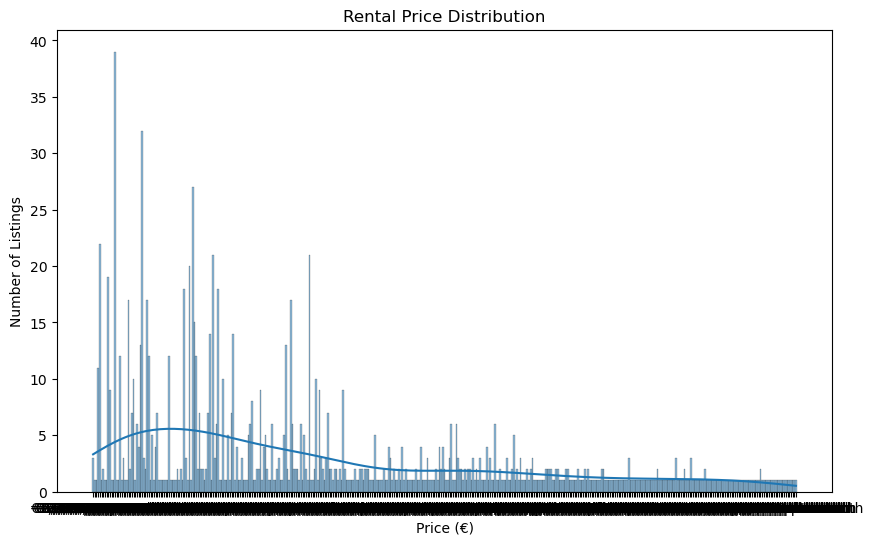

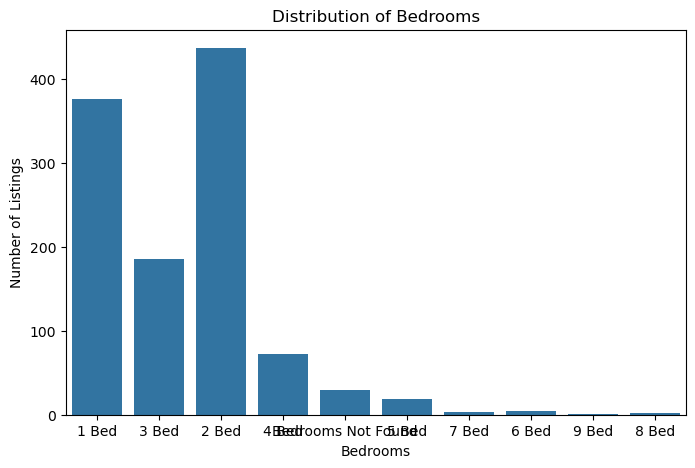

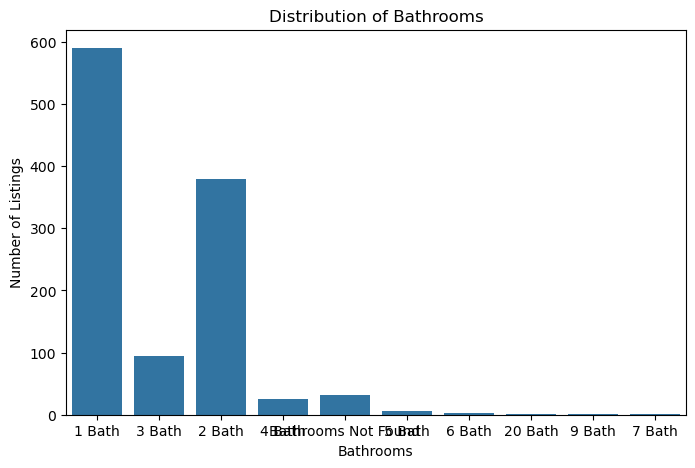

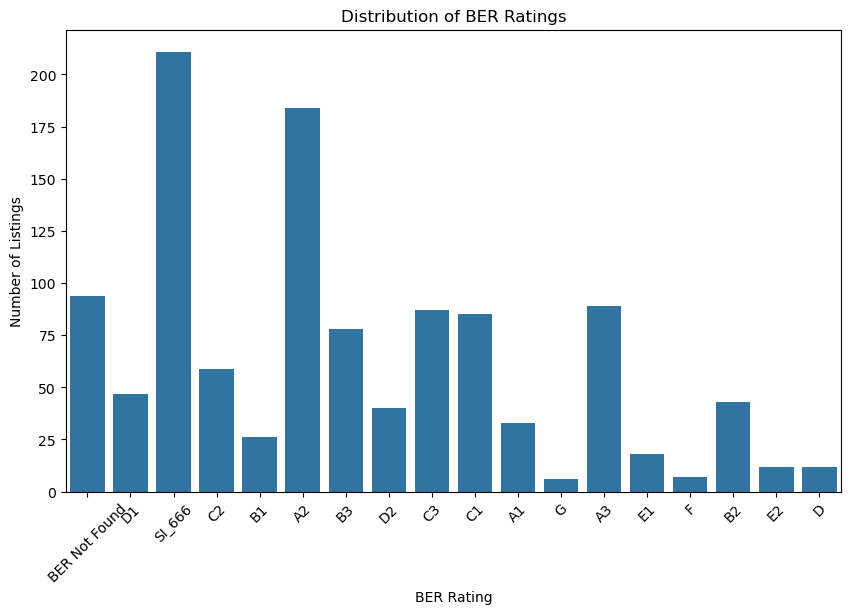

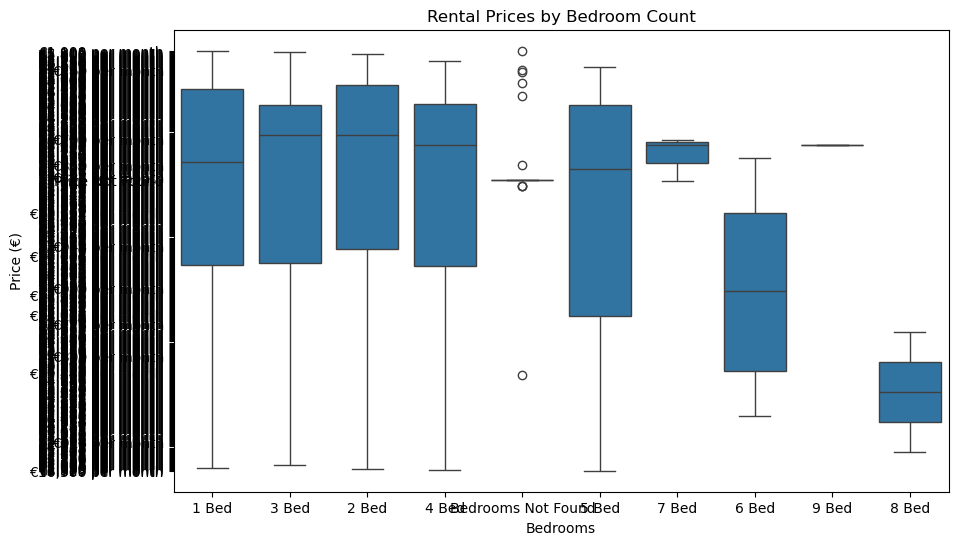

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv('cleaned_daft_listings.csv')

# --- Basic Dataset Overview ---
print("Dataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe(include='all'))

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# --- Price Distribution ---
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Rental Price Distribution')
plt.xlabel('Price (€)')
plt.ylabel('Number of Listings')
plt.show()

# --- Bedrooms Distribution ---
plt.figure(figsize=(8, 5))
sns.countplot(x='Bedrooms', data=df)
plt.title('Distribution of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Number of Listings')
plt.show()

# --- Bathrooms Distribution ---
plt.figure(figsize=(8, 5))
sns.countplot(x='Bathrooms', data=df)
plt.title('Distribution of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Number of Listings')
plt.show()

# --- BER Rating Distribution ---
plt.figure(figsize=(10, 6))
sns.countplot(x='BER Rating', data=df, order=df['BER Rating'].dropna().unique())
plt.title('Distribution of BER Ratings')
plt.xlabel('BER Rating')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

# --- Price by Bedroom Count ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bedrooms', y='Price', data=df)
plt.title('Rental Prices by Bedroom Count')
plt.xlabel('Bedrooms')
plt.ylabel('Price (€)')
plt.show()

# --- Price per Bedroom (Optional New Feature) ---
df['Price_per_Bedroom'] = df['Price'] / df['Bedrooms']

plt.figure(figsize=(10, 6))
sns.histplot(df['Price_per_Bedroom'], bins=50, kde=True)
plt.title('Price per Bedroom Distribution')
plt.xlabel('Price per Bedroom (€)')
plt.ylabel('Number of Listings')
plt.show()

# Save updated dataset with new feature (optional)
df.to_csv('cleaned_with_eda_features.csv', index=False)

print("\nEDA complete! Dataset with price per bedroom saved.")

In [40]:
df.to_csv('cleaned_daft_listings.csv', index=False)

In [41]:
df

,URL,Address,Price,Bedrooms,Bathrooms,Property Type,BER Rating
0,https://www.daft.ie/for-rent/apartment-alpine-...,"Alpine Heights, Clondalkin, Dublin 22","€1,000 per month",1 Bed,1 Bath,Apartment,BER Not Found
1,https://www.daft.ie/for-rent/apartment-3-bedro...,"3 Bedroom Duplex, Castlewood Avenue, Rathmines...","€2,805 per month",3 Bed,1 Bath,Apartment,D1
2,https://www.daft.ie/for-rent/house-22-beechwoo...,"22 Beechwood Avenue Upper, Ranelagh, Dublin 6","€5,100 per month",3 Bed,3 Bath,Apartment,SI_666
3,https://www.daft.ie/for-rent/studio-apartment-...,"16 Leinster Square, Rathmines, Dublin 6","€1,400 per month",1 Bed,1 Bath,Studio,SI_666
4,https://www.daft.ie/for-rent/apartment-seamoun...,"Seamount, Blackrock, Co. Dublin","€2,000 per month",1 Bed,1 Bath,Apartment,C2
...,...,...,...,...,...,...,...
1126,https://www.daft.ie/for-rent/property-17-ragla...,"17 Raglan Road, Dublin 4, Ballsbridge, Dublin 4","€16,300 per month",5 Bed,7 Bath,Apartment,SI_666
1127,https://www.daft.ie/for-rent/house-cherrywood-...,"Cherrywood Crescent, Clondalkin, Dublin 22","€2,500 per month",3 Bed,1 Bath,Apartment,BER Not Found
1128,https://www.daft.ie/for-rent/house-hazelbury-g...,"Hazelbury Green, Clonee, Dublin 15","€3,250 per month",4 Bed,3 Bath,Apartment,B3
1129,https://www.daft.ie/for-rent/apartment-1-bed-n...,"1 Bed, Newmarket Yards, Dublin City Centre, Du...","€2,192 per month",1 Bed,1 Bath,Studio,A2


In [42]:
df.to_csv('daft_rental_scrape_full.csv', index=False)

In [43]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131 entries, 0 to 1130
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   URL            1131 non-null   object
 1   Address        1131 non-null   object
 2   Price          1131 non-null   object
 3   Bedrooms       1131 non-null   object
 4   Bathrooms      1131 non-null   object
 5   Property Type  1131 non-null   object
 6   BER Rating     1131 non-null   object
dtypes: object(7)
memory usage: 62.0+ KB


,URL,Address,Price,Bedrooms,Bathrooms,Property Type,BER Rating
count,1131,1131,1131,1131,1131,1131,1131
unique,1131,999,417,10,10,2,18
top,https://www.daft.ie/for-rent/apartment-alpine-...,Address Not Found,"€2,500 per month",2 Bed,1 Bath,Apartment,SI_666
freq,1,99,39,437,590,888,211


In [44]:
# Remove unwanted text and handle 'Price Not Found'
df['Price'] = df['Price'].str.replace('€', '', regex=False).str.replace('per month', '', regex=False).str.replace(',', '', regex=False)

# Replace 'Price Not Found' with NaN
df['Price'] = df['Price'].replace('Price Not Found', pd.NA)

# Now convert safely to numeric (will keep NaN for missing)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [45]:
# Filter rows with 'Address Not Found'
address_not_found_df = df[df['Address'] == 'Address Not Found']

# Save to CSV for manual review
address_not_found_df.to_csv('address_not_found_listings.csv', index=False)

# Show how many there are
print(f"Listings with 'Address Not Found': {len(address_not_found_df)}")

Listings with 'Address Not Found': 99


In [46]:
address_not_found_df.sample(20)

,URL,Address,Price,Bedrooms,Bathrooms,Property Type,BER Rating
941,https://www.daft.ie/for-rent/semple-woods-semp...,Address Not Found,1327.0,1 Bed,1 Bath,Apartment,A2
222,https://www.daft.ie/for-rent/mill-pond-parnell...,Address Not Found,2650.0,2 Bed,2 Bath,Apartment,A3
631,https://www.daft.ie/for-rent/the-lookout-harbo...,Address Not Found,2200.0,1 Bed,1 Bath,Apartment,A2
290,https://www.daft.ie/for-rent/oatlands-manor-ch...,Address Not Found,4072.0,3 Bed,2 Bath,Apartment,A2
1010,https://www.daft.ie/for-rent/house-6-woodville...,Address Not Found,NaN,Bedrooms Not Found,Bathrooms Not Found,Apartment,BER Not Found
937,https://www.daft.ie/for-rent/apartment-carring...,Address Not Found,NaN,Bedrooms Not Found,Bathrooms Not Found,Apartment,BER Not Found
1029,https://www.daft.ie/for-rent/the-grange-reside...,Address Not Found,2199.0,1 Bed,1 Bath,Apartment,A2
90,https://www.daft.ie/for-rent/eglinton-place-eg...,Address Not Found,2650.0,1 Bed,1 Bath,Apartment,A1
433,https://www.daft.ie/for-rent/mayor-square-mayo...,Address Not Found,NaN,Bedrooms Not Found,Bathrooms Not Found,Apartment,SI_666
163,https://www.daft.ie/for-rent/u-clay-farm-clay-...,Address Not Found,2177.0,1 Bed,1 Bath,Apartment,A3


In [47]:
search_address = "Easra Court , Collins Avenue, Killester, Dublin 5"

# Check if any addresses in the dataset contain the search string (case insensitive)
matching_listings = df[df['Address'].str.contains(search_address, case=False, na=False)]

# View the matching results
matching_listings

,URL,Address,Price,Bedrooms,Bathrooms,Property Type,BER Rating


In [48]:
# Drop rows where Address is 'Address Not Found'
df_cleaned = df[df['Address'] != 'Address Not Found']

# Reset index for the cleaned dataset
df_cleaned = df_cleaned.reset_index(drop=True)

Cleaned Dataset Preview:
                                                 URL  \
0  https://www.daft.ie/for-rent/apartment-alpine-...   
1  https://www.daft.ie/for-rent/apartment-3-bedro...   
2  https://www.daft.ie/for-rent/house-22-beechwoo...   
3  https://www.daft.ie/for-rent/studio-apartment-...   
4  https://www.daft.ie/for-rent/apartment-seamoun...   
5  https://www.daft.ie/for-rent/apartment-apartme...   
6  https://www.daft.ie/for-rent/apartment-apartme...   
7  https://www.daft.ie/for-rent/studio-apartment-...   
8  https://www.daft.ie/for-rent/apartment-new-ses...   
9  https://www.daft.ie/for-rent/apartment-the-win...   

                                             Address   Price Bedrooms  \
0              Alpine Heights, Clondalkin, Dublin 22  1000.0    1 Bed   
1  3 Bedroom Duplex, Castlewood Avenue, Rathmines...  2805.0    3 Bed   
2      22 Beechwood Avenue Upper, Ranelagh, Dublin 6  5100.0    3 Bed   
3            16 Leinster Square, Rathmines, Dublin 6  1400.0    1 

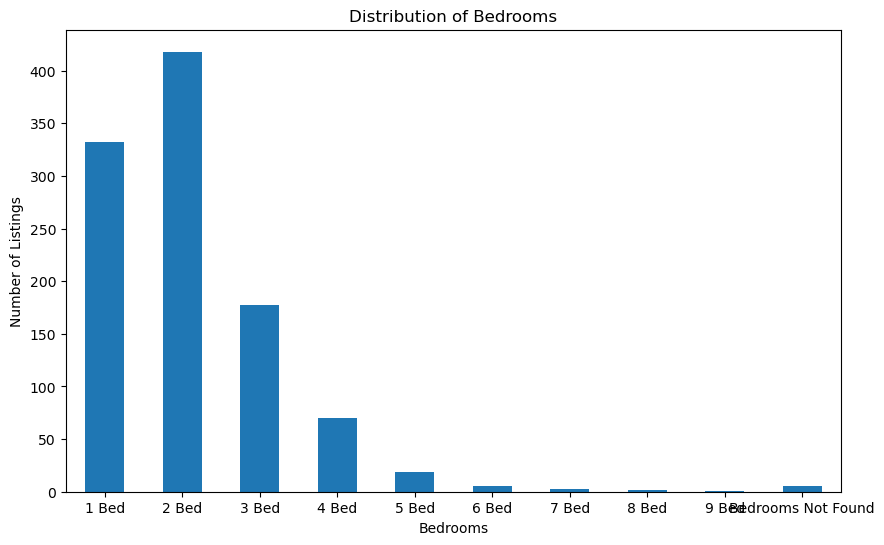

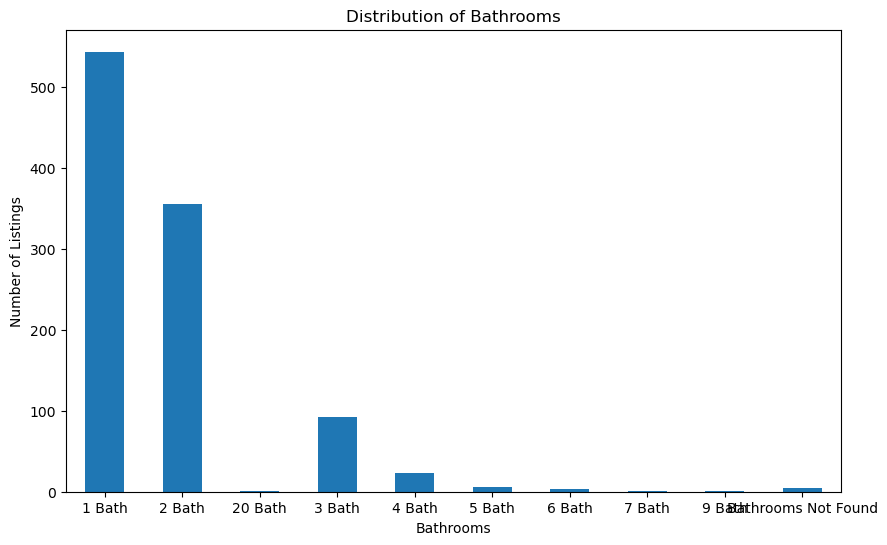

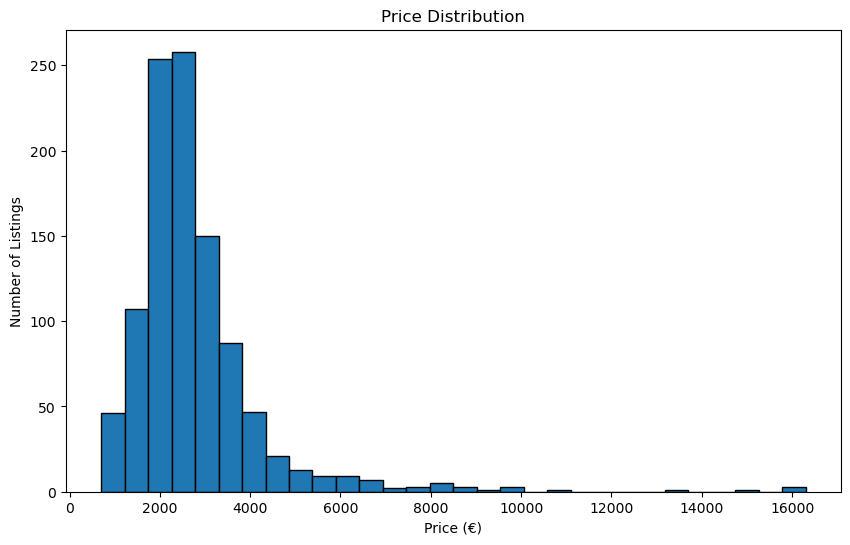

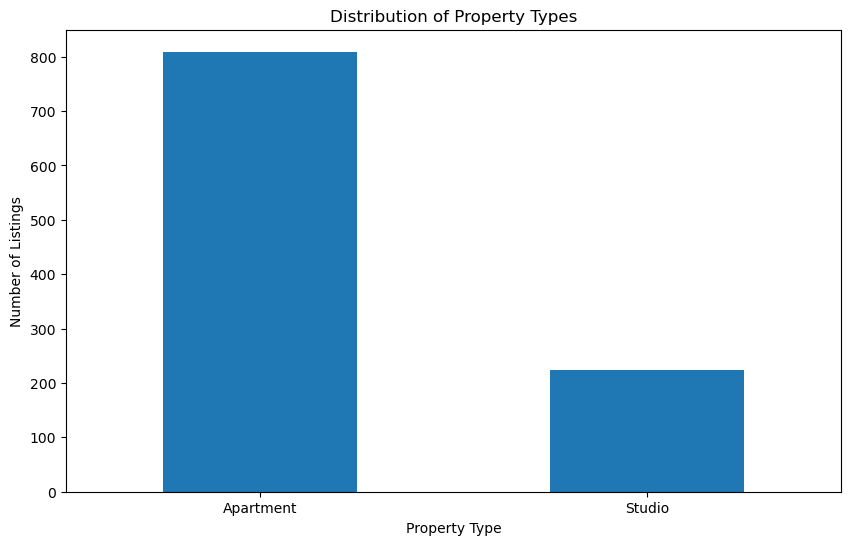

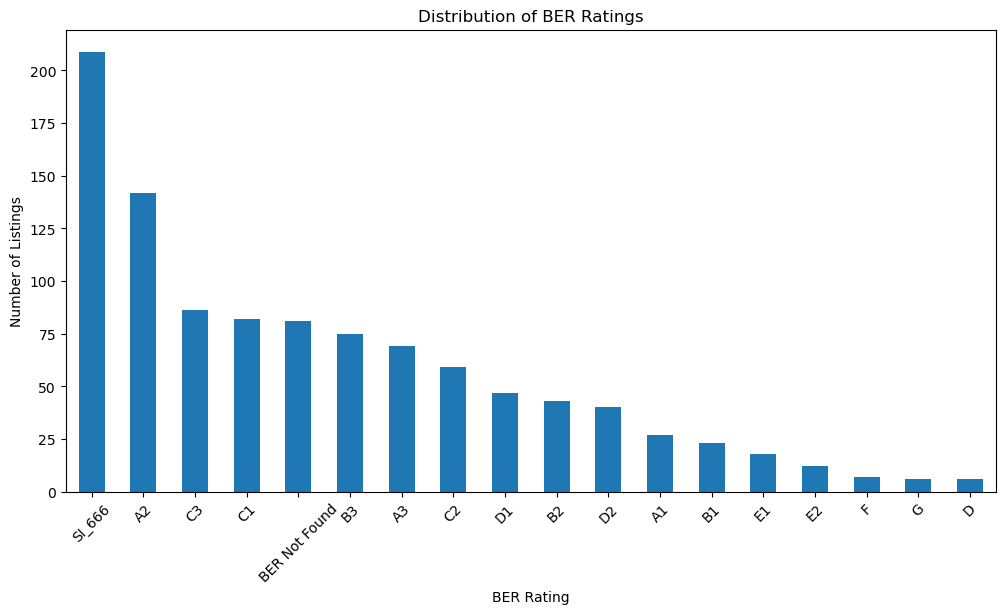

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# View cleaned dataset (first 10 rows)
print("Cleaned Dataset Preview:")
print(df_cleaned.head(10))

# Dataset info
print("\nDataset Info:")
print(df_cleaned.info())

# Dataset descriptive statistics (Price only)
print("\nPrice Statistics:")
print(df_cleaned['Price'].describe())

# Frequency counts for key categorical columns
print("\nBedrooms Frequency:")
print(df_cleaned['Bedrooms'].value_counts())

print("\nBathrooms Frequency:")
print(df_cleaned['Bathrooms'].value_counts())

print("\nProperty Type Frequency:")
print(df_cleaned['Property Type'].value_counts())

print("\nBER Rating Frequency:")
print(df_cleaned['BER Rating'].value_counts())

# Plot: Distribution of Bedrooms
plt.figure(figsize=(10, 6))
df_cleaned['Bedrooms'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Number of Listings')
plt.xticks(rotation=0)
plt.show()

# Plot: Distribution of Bathrooms
plt.figure(figsize=(10, 6))
df_cleaned['Bathrooms'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Number of Listings')
plt.xticks(rotation=0)
plt.show()

# Plot: Price Distribution
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['Price'], bins=30, edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price (€)')
plt.ylabel('Number of Listings')
plt.show()

# Plot: Property Type Distribution
plt.figure(figsize=(10, 6))
df_cleaned['Property Type'].value_counts().plot(kind='bar')
plt.title('Distribution of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Number of Listings')
plt.xticks(rotation=0)
plt.show()

# Plot: BER Rating Distribution
plt.figure(figsize=(12, 6))
df_cleaned['BER Rating'].value_counts().plot(kind='bar')
plt.title('Distribution of BER Ratings')
plt.xlabel('BER Rating')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

In [50]:
# Check original df to confirm what needs cleaning
print("Original DataFrame Preview:")
print(df.head(10))

# Check if df_cleaned exists in memory and view it
try:
    print("\nCleaned DataFrame Preview:")
    print(df_cleaned.head(10))
except NameError:
    print("\ndf_cleaned does not exist yet. Starting from df.")

Original DataFrame Preview:
                                                 URL  \
0  https://www.daft.ie/for-rent/apartment-alpine-...   
1  https://www.daft.ie/for-rent/apartment-3-bedro...   
2  https://www.daft.ie/for-rent/house-22-beechwoo...   
3  https://www.daft.ie/for-rent/studio-apartment-...   
4  https://www.daft.ie/for-rent/apartment-seamoun...   
5  https://www.daft.ie/for-rent/apartment-apartme...   
6  https://www.daft.ie/for-rent/apartment-apartme...   
7  https://www.daft.ie/for-rent/studio-apartment-...   
8  https://www.daft.ie/for-rent/apartment-new-ses...   
9  https://www.daft.ie/for-rent/apartment-the-win...   

                                             Address   Price Bedrooms  \
0              Alpine Heights, Clondalkin, Dublin 22  1000.0    1 Bed   
1  3 Bedroom Duplex, Castlewood Avenue, Rathmines...  2805.0    3 Bed   
2      22 Beechwood Avenue Upper, Ranelagh, Dublin 6  5100.0    3 Bed   
3            16 Leinster Square, Rathmines, Dublin 6  1400.0   

In [51]:
df_cleaned['BER Rating'] = df_cleaned['BER Rating'].replace('SI_666', 'BER EXEMPT')
df_cleaned.head(10)

,URL,Address,Price,Bedrooms,Bathrooms,Property Type,BER Rating
0,https://www.daft.ie/for-rent/apartment-alpine-...,"Alpine Heights, Clondalkin, Dublin 22",1000.0,1 Bed,1 Bath,Apartment,BER Not Found
1,https://www.daft.ie/for-rent/apartment-3-bedro...,"3 Bedroom Duplex, Castlewood Avenue, Rathmines...",2805.0,3 Bed,1 Bath,Apartment,D1
2,https://www.daft.ie/for-rent/house-22-beechwoo...,"22 Beechwood Avenue Upper, Ranelagh, Dublin 6",5100.0,3 Bed,3 Bath,Apartment,BER EXEMPT
3,https://www.daft.ie/for-rent/studio-apartment-...,"16 Leinster Square, Rathmines, Dublin 6",1400.0,1 Bed,1 Bath,Studio,BER EXEMPT
4,https://www.daft.ie/for-rent/apartment-seamoun...,"Seamount, Blackrock, Co. Dublin",2000.0,1 Bed,1 Bath,Apartment,C2
5,https://www.daft.ie/for-rent/apartment-apartme...,"Apartment 6, 23 Leeson Street Upper, Dublin 4",1814.0,1 Bed,1 Bath,Studio,BER EXEMPT
6,https://www.daft.ie/for-rent/apartment-apartme...,"Apartment, The Crofton, Dun Laoghaire, Co. Dublin",2995.0,2 Bed,2 Bath,Apartment,B1
7,https://www.daft.ie/for-rent/studio-apartment-...,"Flat 1 , 55 Richmond Street South, Portobello,...",1510.0,1 Bed,1 Bath,Studio,BER EXEMPT
8,https://www.daft.ie/for-rent/apartment-new-ses...,"New Seskin Court, Tallaght, Dublin 24",2112.0,2 Bed,2 Bath,Apartment,BER Not Found
9,https://www.daft.ie/for-rent/apartment-the-win...,"The Windmill, Sir John Rogersons Quay, Dublin 2",2200.0,2 Bed,1 Bath,Apartment,BER Not Found


In [52]:
print("Unique values in Bedrooms column:")
print(df_cleaned['Bedrooms'].unique())

print("\nUnique values in Bathrooms column:")
print(df_cleaned['Bathrooms'].unique())

Unique values in Bedrooms column:
['1 Bed' '3 Bed' '2 Bed' '4 Bed' '5 Bed' '7 Bed' '6 Bed'
 'Bedrooms Not Found' '9 Bed' '8 Bed']

Unique values in Bathrooms column:
['1 Bath' '3 Bath' '2 Bath' '4 Bath' '5 Bath' '6 Bath' '20 Bath'
 'Bathrooms Not Found' '9 Bath' '7 Bath']


In [53]:
print("Bedrooms value counts:")
print(df_cleaned['Bedrooms'].value_counts())

print("\nBathrooms value counts:")
print(df_cleaned['Bathrooms'].value_counts())

Bedrooms value counts:
Bedrooms
2 Bed                 418
1 Bed                 332
3 Bed                 177
4 Bed                  70
5 Bed                  19
6 Bed                   5
Bedrooms Not Found      5
7 Bed                   3
8 Bed                   2
9 Bed                   1
Name: count, dtype: int64

Bathrooms value counts:
Bathrooms
1 Bath                 544
2 Bath                 356
3 Bath                  92
4 Bath                  23
5 Bath                   6
Bathrooms Not Found      5
6 Bath                   3
20 Bath                  1
9 Bath                   1
7 Bath                   1
Name: count, dtype: int64


In [54]:
# Remove rows with "Bedrooms Not Found" or "Bathrooms Not Found"
df_cleaned = df_cleaned[
    (df_cleaned['Bedrooms'] != 'Bedrooms Not Found') &
    (df_cleaned['Bathrooms'] != 'Bathrooms Not Found')
].reset_index(drop=True)

In [55]:
print("Bedrooms unique values after cleanup:")
print(df_cleaned['Bedrooms'].unique())

print("\nBathrooms unique values after cleanup:")
print(df_cleaned['Bathrooms'].unique())

Bedrooms unique values after cleanup:
['1 Bed' '3 Bed' '2 Bed' '4 Bed' '5 Bed' '7 Bed' '6 Bed' '9 Bed' '8 Bed']

Bathrooms unique values after cleanup:
['1 Bath' '3 Bath' '2 Bath' '4 Bath' '5 Bath' '6 Bath' '20 Bath' '9 Bath'
 '7 Bath']


In [56]:
print("Unique values in Property Type column:")
print(df_cleaned['Property Type'].unique())

Unique values in Property Type column:
['Apartment' 'Studio']


In [57]:
twenty_bath = df_cleaned[df_cleaned['Bathrooms'] == '20 Bath']
print(twenty_bath)

                                                   URL  \
357  https://www.daft.ie/for-rent/house-20-bath-str...   

                                           Address   Price Bedrooms Bathrooms  \
357  20 Bath Street, Dublin 4, Irishtown, Dublin 4  2700.0    2 Bed   20 Bath   

    Property Type BER Rating  
357     Apartment         D1  


In [58]:
df_cleaned.loc[
    df_cleaned['URL'].str.contains('house', case=False, na=False),
    'Property Type'
] = 'House'

In [59]:
print(df_cleaned['Property Type'].value_counts())

Property Type
Apartment    498
House        325
Studio       204
Name: count, dtype: int64


In [60]:
# Strip non-numeric parts and convert to integer
print("Bedrooms (cleaned):", df_cleaned['Bedrooms'].unique())
print("Bathrooms (cleaned):", df_cleaned['Bathrooms'].unique())

Bedrooms (cleaned): ['1 Bed' '3 Bed' '2 Bed' '4 Bed' '5 Bed' '7 Bed' '6 Bed' '9 Bed' '8 Bed']
Bathrooms (cleaned): ['1 Bath' '3 Bath' '2 Bath' '4 Bath' '5 Bath' '6 Bath' '20 Bath' '9 Bath'
 '7 Bath']


In [61]:
df_cleaned.loc[df_cleaned['Bathrooms'] == 20, 'Bathrooms'] = 1

In [62]:
# Preview the first few rows
print(df_cleaned.head())

# Get structure and types
print("\nDataset Info:")
print(df_cleaned.info())

# Summary statistics for numeric columns
print("\nDescriptive Statistics:")
print(df_cleaned.describe())

                                                 URL  \
0  https://www.daft.ie/for-rent/apartment-alpine-...   
1  https://www.daft.ie/for-rent/apartment-3-bedro...   
2  https://www.daft.ie/for-rent/house-22-beechwoo...   
3  https://www.daft.ie/for-rent/studio-apartment-...   
4  https://www.daft.ie/for-rent/apartment-seamoun...   

                                             Address   Price Bedrooms  \
0              Alpine Heights, Clondalkin, Dublin 22  1000.0    1 Bed   
1  3 Bedroom Duplex, Castlewood Avenue, Rathmines...  2805.0    3 Bed   
2      22 Beechwood Avenue Upper, Ranelagh, Dublin 6  5100.0    3 Bed   
3            16 Leinster Square, Rathmines, Dublin 6  1400.0    1 Bed   
4                    Seamount, Blackrock, Co. Dublin  2000.0    1 Bed   

  Bathrooms Property Type     BER Rating  
0    1 Bath     Apartment  BER Not Found  
1    1 Bath     Apartment             D1  
2    3 Bath         House     BER EXEMPT  
3    1 Bath        Studio     BER EXEMPT  
4    1 Ba

In [63]:
print("\nProperty Type Frequency:")
print(df_cleaned['Property Type'].value_counts())

print("\nBER Rating Frequency:")
print(df_cleaned['BER Rating'].value_counts())


Property Type Frequency:
Property Type
Apartment    498
House        325
Studio       204
Name: count, dtype: int64

BER Rating Frequency:
BER Rating
BER EXEMPT       207
A2               140
C3                86
C1                82
BER Not Found     81
B3                75
A3                69
C2                58
D1                47
B2                43
D2                40
A1                27
B1                23
E1                18
E2                12
F                  7
G                  6
D                  6
Name: count, dtype: int64


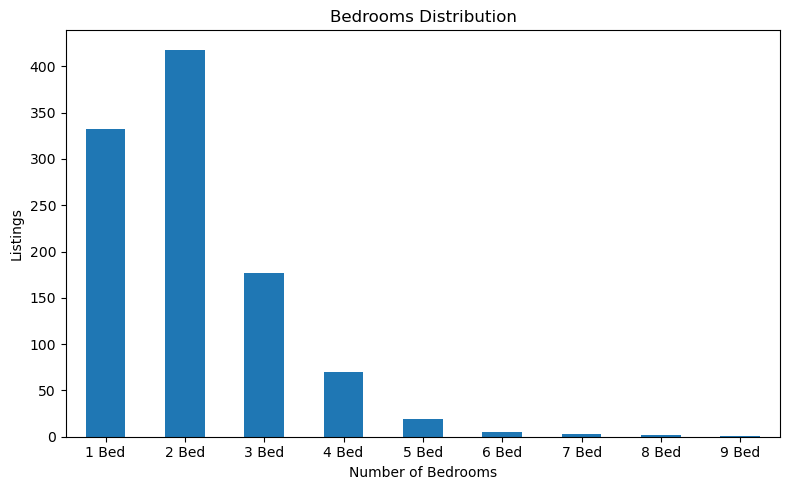

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
df_cleaned['Bedrooms'].value_counts().sort_index().plot(kind='bar')
plt.title('Bedrooms Distribution')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Listings')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

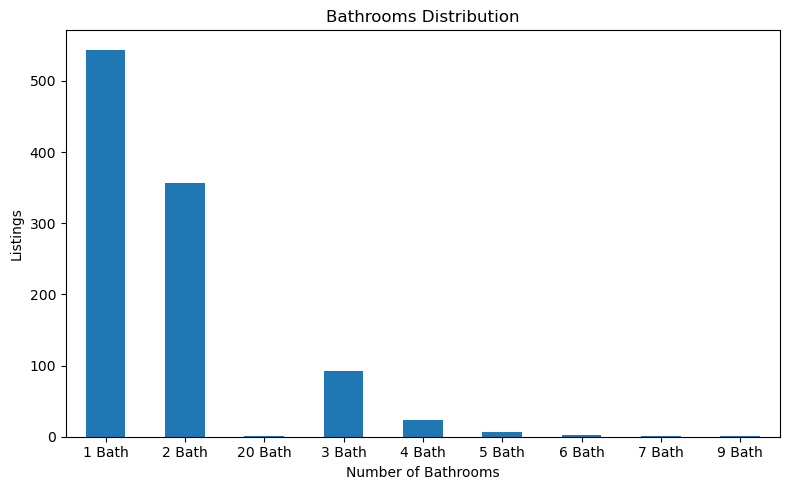

In [65]:
plt.figure(figsize=(8, 5))
df_cleaned['Bathrooms'].value_counts().sort_index().plot(kind='bar')
plt.title('Bathrooms Distribution')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Listings')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

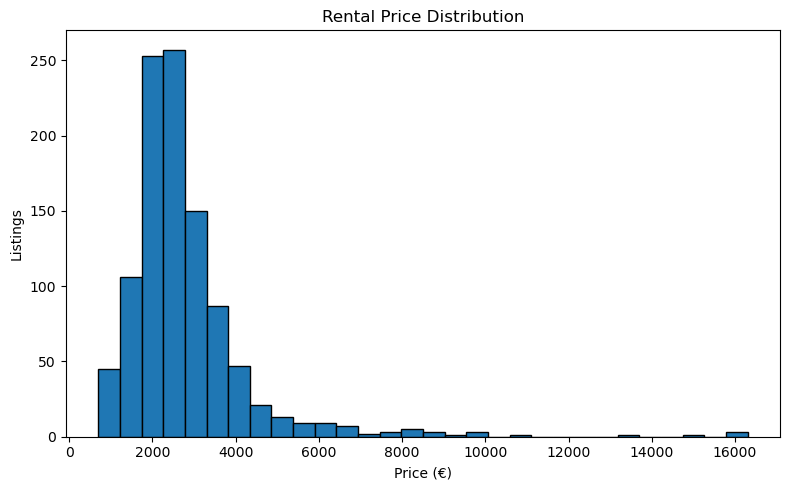

In [66]:
plt.figure(figsize=(8, 5))
plt.hist(df_cleaned['Price'], bins=30, edgecolor='black')
plt.title('Rental Price Distribution')
plt.xlabel('Price (€)')
plt.ylabel('Listings')
plt.tight_layout()
plt.show()

In [67]:
import re

def extract_dublin_area(address):
    match = re.search(r'dublin\s*\d+', address.lower())
    return match.group(0).title() if match else 'Other'

df_cleaned['Dublin Area'] = df_cleaned['Address'].apply(extract_dublin_area)

In [68]:
mean_prices_by_area = df_cleaned.groupby('Dublin Area')['Price'].mean().sort_values()
print(mean_prices_by_area)

Dublin Area
Dublin3      1030.000000
Dublin 10    1592.000000
Dublin 20    2027.300000
Dublin 24    2042.423077
Dublin 7     2222.444444
Dublin 11    2241.588235
Dublin 8     2319.557143
Dublin 3     2320.948718
Dublin 9     2397.857143
Dublin 22    2439.583333
Dublin 13    2441.388889
Dublin 15    2560.611111
Dublin 14    2593.125000
Dublin 5     2615.769231
Dublin 1     2629.706897
Dublin 12    2643.900000
Dublin 2     2769.542373
Dublin 6     2841.186275
Other        2878.000000
Dublin 16    2901.428571
Dublin 18    2952.852459
Dublin 17    3139.666667
Dublin 4     3781.645669
Name: Price, dtype: float64


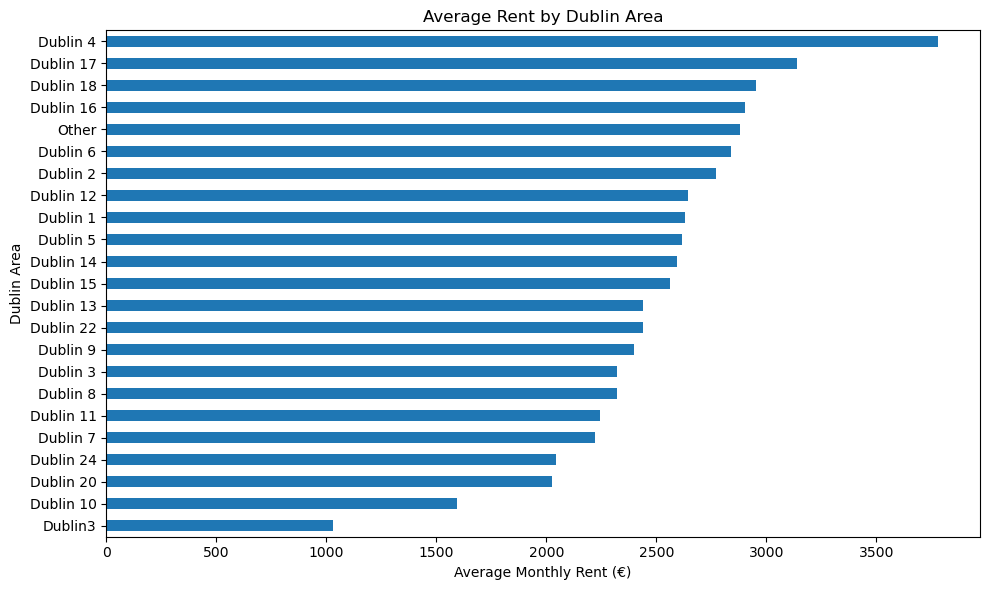

In [69]:
mean_prices_by_area.plot(kind='barh', figsize=(10, 6))
plt.title('Average Rent by Dublin Area')
plt.xlabel('Average Monthly Rent (€)')
plt.ylabel('Dublin Area')
plt.tight_layout()
plt.show()

In [70]:
avg_price = df_cleaned.groupby(['Dublin Area', 'Property Type'])['Price'].mean().reset_index()

In [71]:
avg_price_beds = df_cleaned.groupby(['Dublin Area', 'Bedrooms'])['Price'].mean().reset_index()

In [72]:
def calculate_price_vs_avg(row):
    try:
        area_avg = avg_price_beds[
            (avg_price_beds['Dublin Area'] == row['Dublin Area']) & 
            (avg_price_beds['Bedrooms'] == row['Bedrooms'])
        ]['Price'].values[0]
        return (row['Price'] - area_avg) / area_avg * 100
    except:
        return None

df_cleaned['% Above Area Avg for Beds'] = df_cleaned.apply(calculate_price_vs_avg, axis=1)

In [73]:
avg_price_by_area_type = df_cleaned.groupby(['Dublin Area', 'Property Type'])['Price'].mean().reset_index()
avg_price_by_area_type = avg_price_by_area_type.sort_values(by=['Dublin Area', 'Property Type'])
print(avg_price_by_area_type.head(10))

  Dublin Area Property Type        Price
0    Dublin 1     Apartment  2574.962963
1    Dublin 1         House  3702.200000
2    Dublin 1        Studio  1716.625000
3   Dublin 10     Apartment  2000.000000
4   Dublin 10         House  1534.000000
5   Dublin 10        Studio  1300.000000
6   Dublin 11     Apartment  2081.000000
7   Dublin 11         House  2661.333333
8   Dublin 11        Studio  1250.000000
9   Dublin 12     Apartment  2620.500000


In [74]:
avg_price_by_area_bedrooms = df_cleaned.groupby(['Dublin Area', 'Bedrooms'])['Price'].mean().reset_index()
avg_price_by_area_bedrooms = avg_price_by_area_bedrooms.sort_values(by=['Dublin Area', 'Bedrooms'])
print(avg_price_by_area_bedrooms.head(10))

  Dublin Area Bedrooms         Price
0    Dublin 1    1 Bed   1857.904762
1    Dublin 1    2 Bed   2567.870968
2    Dublin 1    3 Bed   3119.333333
3    Dublin 1    4 Bed   4275.000000
4    Dublin 1    6 Bed  15995.000000
5   Dublin 10    1 Bed   1150.000000
6   Dublin 10    2 Bed   2000.000000
7   Dublin 10    3 Bed   2068.000000
8   Dublin 11    1 Bed   1508.000000
9   Dublin 11    2 Bed   2316.250000


In [75]:
avg_price_by_area_type['Price'] = avg_price_by_area_type['Price'].round(0).astype(int)
avg_price_by_area_bedrooms['Price'] = avg_price_by_area_bedrooms['Price'].round(0).astype(int)

In [76]:
print(df_cleaned.columns)

Index(['URL', 'Address', 'Price', 'Bedrooms', 'Bathrooms', 'Property Type',
       'BER Rating', 'Dublin Area', '% Above Area Avg for Beds'],
      dtype='object')


In [77]:
# Overpriced listings
overpriced = df_cleaned[df_cleaned['% Above Area Avg for Beds'] > 20]
print(overpriced[['Address', 'Dublin Area', 'Bedrooms', 'Price', '% Above Area Avg for Beds']].head())

# Bargains
underpriced = df_cleaned[df_cleaned['% Above Area Avg for Beds'] < -10]
print(underpriced[['Address', 'Dublin Area', 'Bedrooms', 'Price', '% Above Area Avg for Beds']].head())

                                              Address Dublin Area Bedrooms  \
11  1 Bed Apartment to Let, Capital Dock Residence...    Dublin 2    1 Bed   
12                           19 Glenara, Kincora Road       Other    4 Bed   
16  13 Spencer Villas, Glenageary, Glasthule, Co. ...       Other    4 Bed   
23            Flat 7, 4 North Circular Road, Dublin 7    Dublin 7    1 Bed   
29                        78 francis street, Dublin 8    Dublin 8    1 Bed   

     Price  % Above Area Avg for Beds  
11  3390.0                  77.465794  
12  6150.0                  56.448741  
16  8315.0                 111.523785  
23  1895.0                  21.822220  
29  3000.0                  64.040364  
                                             Address Dublin Area Bedrooms  \
0              Alpine Heights, Clondalkin, Dublin 22   Dublin 22    1 Bed   
1  3 Bedroom Duplex, Castlewood Avenue, Rathmines...    Dublin 6    3 Bed   
3            16 Leinster Square, Rathmines, Dublin 6    Dubl

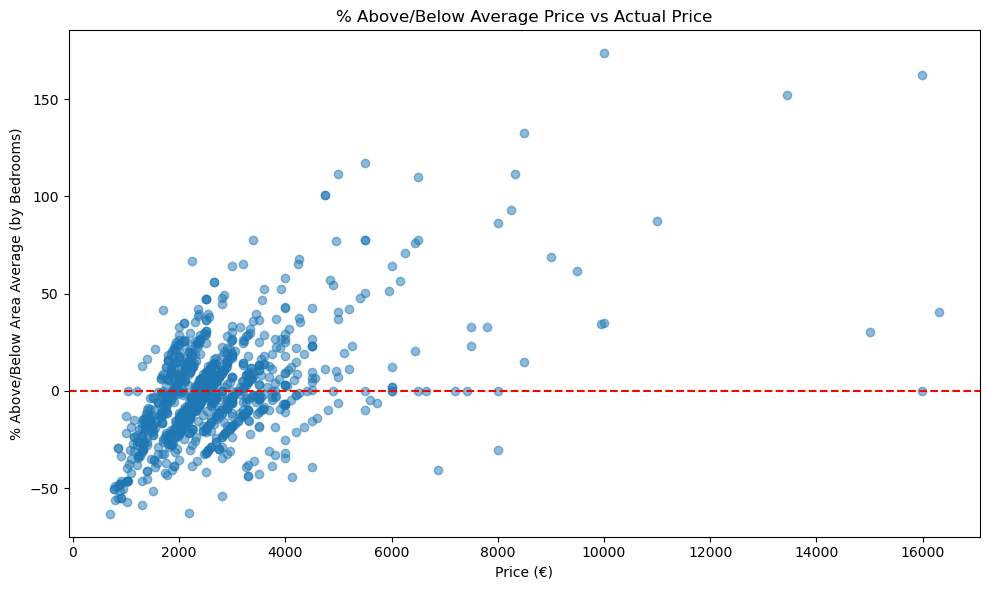

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Price'], df_cleaned['% Above Area Avg for Beds'], alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('% Above/Below Average Price vs Actual Price')
plt.xlabel('Price (€)')
plt.ylabel('% Above/Below Area Average (by Bedrooms)')
plt.tight_layout()
plt.show()

In [79]:
def label_value(row):
    if row['% Above Area Avg for Beds'] < -10:
        return 'Underpriced'
    elif row['% Above Area Avg for Beds'] > 20:
        return 'Overpriced'
    else:
        return 'Average'

df_cleaned['Value Category'] = df_cleaned.apply(label_value, axis=1)

In [80]:
def format_listing_summary(row):
    area = row['Dublin Area']
    beds = f"{row['Bedrooms']} Bed"
    ptype = row['Property Type']
    price = f"€{int(row['Price'])}"
    
    percent = row['% Above Area Avg for Beds']
    if pd.isna(percent):
        comparison = "↳ no area avg available"
    else:
        sign = 'above' if percent > 0 else 'below'
        comparison = f"↳ {abs(round(percent))}% {sign} area avg for {beds.lower()}s"
    
    return f"{area} – {beds} {ptype} – {price}\n{comparison}"

df_cleaned['Listing Summary'] = df_cleaned.apply(format_listing_summary, axis=1)

In [81]:
print(df_cleaned[['Listing Summary']].head(10))

                                     Listing Summary
0  Dublin 22 – 1 Bed Bed Apartment – €1000\n↳ 22%...
1  Dublin 6 – 3 Bed Bed Apartment – €2805\n↳ 34% ...
2  Dublin 6 – 3 Bed Bed House – €5100\n↳ 19% abov...
3  Dublin 6 – 1 Bed Bed Studio – €1400\n↳ 17% bel...
4  Other – 1 Bed Bed Apartment – €2000\n↳ 6% abov...
5  Dublin 4 – 1 Bed Bed Studio – €1814\n↳ 23% bel...
6  Other – 2 Bed Bed Apartment – €2995\n↳ 18% abo...
7  Dublin 8 – 1 Bed Bed Studio – €1510\n↳ 17% bel...
8  Dublin 24 – 2 Bed Bed Apartment – €2112\n↳ 5% ...
9  Dublin 2 – 2 Bed Bed Apartment – €2200\n↳ 30% ...


In [82]:
import pandas as pd

# Load the CSV
ppr = pd.read_csv('PPR2021_2024.csv')

# Rename the price column correctly
ppr.rename(columns={'Price (�)': 'price'}, inplace=True)

# Standardize all column names
ppr.columns = ppr.columns.str.strip().str.replace('.', '', regex=False).str.replace(' ', '_').str.lower()

# Convert price to numeric
ppr['price'] = ppr['price'].astype(str).str.replace(',', '').str.extract(r'(\d+)')
ppr['price'] = pd.to_numeric(ppr['price'], errors='coerce')

# Convert date to datetime
ppr['date_of_sale'] = pd.to_datetime(ppr['date_of_sale_(dd/mm/yyyy)'], dayfirst=True)

# Keep only Dublin sales
ppr = ppr[ppr['county'].str.lower().str.contains('dublin', na=False)]

# Clean address for fuzzy matching
ppr['clean_address'] = ppr['address'].str.lower().str.replace(',', '').str.replace('.', '').str.strip()

# Preview cleaned data
print(ppr[['clean_address', 'price', 'date_of_sale']].sample(10))

                                      clean_address   price date_of_sale
29199        21 balfe rd east walkinstown dublin 12  590000   2024-08-21
47047              2 monaloe court blackrock dublin  425000   2023-07-24
59267               15 woodville grove lucan dublin  370000   2021-03-12
64203           15 killeen crescent malahide dublin  665000   2021-07-08
53558         53 hampton woods balbriggan co dublin  391000   2023-11-15
61304      28 hollybank ave lower ranelagh dublin 6  950000   2021-04-30
14331           16 strangford rd east wall dublin 3  250000   2022-10-20
35622     106 jervis place great strand st dublin 1  385000   2024-12-04
32958  5 watson place ballyroan heights rathfarnham  837004   2024-10-22
29228     47 collinstown grove clondalkin dublin 22   30000   2024-08-21


In [83]:
!pip install rapidfuzz

In [84]:
df_cleaned['clean_address'] = df_cleaned['Address'].str.lower().str.replace(',', '').str.replace('.', '').str.strip()

In [85]:
from rapidfuzz import process, fuzz

# Example Daft address to test
test_address = df_cleaned.loc[0, 'clean_address']

# Find the best match from PPR
match, score, index = process.extractOne(
    test_address,
    ppr['clean_address'],
    scorer=fuzz.token_sort_ratio
)

# Show the match
print(f"DAFT: {test_address}")
print(f"MATCHED PPR: {ppr.iloc[index]['clean_address']} — €{int(ppr.iloc[index]['price'])} ({score}% match)")

DAFT: alpine heights clondalkin dublin 22
MATCHED PPR: 80 alpine heights clondalkin dublin 22 — €348000 (95.89041095890411% match)


In [86]:
from rapidfuzz import process, fuzz

# Limit to 5 Daft listings for testing
sample_daft = df_cleaned[['Address', 'Price']].head(5).copy()

# Create a list of sale addresses from PPR
sale_addresses = ppr['clean_address'].tolist()

# Define matching function
def find_best_match(daft_address):
    match = process.extractOne(
        daft_address.lower(), sale_addresses, scorer=fuzz.token_sort_ratio
    )
    return match[0], match[1]  # matched address, similarity score

# Apply to Daft addresses
sample_daft[['Matched Sale Address', 'Match Score']] = sample_daft['Address'].apply(
    lambda x: pd.Series(find_best_match(x))
)

# Merge to get sale price
sample_daft = sample_daft.merge(
    ppr[['clean_address', 'price']],
    left_on='Matched Sale Address',
    right_on='clean_address',
    how='left'
)

# Calculate rental yield
sample_daft['Estimated Value (from PPR)'] = sample_daft['price']
sample_daft['Rental Yield (%)'] = (sample_daft['Price'] * 12) / sample_daft['Estimated Value (from PPR)'] * 100

# Clean display
sample_daft = sample_daft[['Address', 'Price', 'Matched Sale Address', 'Estimated Value (from PPR)', 'Rental Yield (%)', 'Match Score']]
print(sample_daft)

                                             Address   Price  \
0              Alpine Heights, Clondalkin, Dublin 22  1000.0   
1  3 Bedroom Duplex, Castlewood Avenue, Rathmines...  2805.0   
2  3 Bedroom Duplex, Castlewood Avenue, Rathmines...  2805.0   
3      22 Beechwood Avenue Upper, Ranelagh, Dublin 6  5100.0   
4            16 Leinster Square, Rathmines, Dublin 6  1400.0   
5                    Seamount, Blackrock, Co. Dublin  2000.0   

                          Matched Sale Address  Estimated Value (from PPR)  \
0       80 alpine heights clondalkin dublin 22                      348000   
1      10 castlewood avenue rathmines dublin 6                     1000000   
2      10 castlewood avenue rathmines dublin 6                     1145000   
3  17 upper beechwood avenue ranelagh dublin 6                      950000   
4        16 leinster square rathmines dublin 6                        7500   
5          85 mount albany blackrock co dublin                      705000   

   R

In [87]:
# Remove low-confidence matches and bad prices
sample_daft = sample_daft[
    (sample_daft['Match Score'] > 80) &
    (sample_daft['Estimated Value (from PPR)'] > 50000)
]

In [88]:
print(type(ppr))
print(ppr.columns)

<class 'pandas.core.frame.DataFrame'>
Index(['date_of_sale_(dd/mm/yyyy)', 'address', 'county', 'eircode', 'price',
       'not_full_market_price', 'vat_exclusive', 'description_of_property',
       'property_size_description', 'date_of_sale', 'clean_address'],
      dtype='object')


In [89]:
print(type(df_cleaned))
print(df_cleaned.columns)

<class 'pandas.core.frame.DataFrame'>
Index(['URL', 'Address', 'Price', 'Bedrooms', 'Bathrooms', 'Property Type',
       'BER Rating', 'Dublin Area', '% Above Area Avg for Beds',
       'Value Category', 'Listing Summary', 'clean_address'],
      dtype='object')


In [90]:
print(df_cleaned[['Address']].head())

                                             Address
0              Alpine Heights, Clondalkin, Dublin 22
1  3 Bedroom Duplex, Castlewood Avenue, Rathmines...
2      22 Beechwood Avenue Upper, Ranelagh, Dublin 6
3            16 Leinster Square, Rathmines, Dublin 6
4                    Seamount, Blackrock, Co. Dublin


In [91]:
print(ppr[['clean_address', 'price']].sample(5))

                                           clean_address   price
14230  4 castleland park lawn castleland park balbriggan  325991
29524           69 ballsbridge wood ballsbridge dublin 4  585000
55456               3 barnwell heath hansfield dublin 15  493392
32090            summerville 11 foxgrove skerries dublin  955000
9085               33 beechpark cherrywood dun laoghaire  519824


In [92]:
from rapidfuzz import process, fuzz
from tqdm import tqdm

# Ensure tqdm shows inside Jupyter
tqdm.pandas()

# Create a list of all sale addresses
sale_addresses = ppr['clean_address'].tolist()

# Define a safe match function
def match_address(daft_address):
    try:
        match = process.extractOne(
            daft_address.lower(), sale_addresses, scorer=fuzz.token_sort_ratio
        )
        return pd.Series([match[0], match[1]])  # matched address, score
    except:
        return pd.Series([None, None])

# Apply to all Daft addresses
df_cleaned[['Matched Sale Address', 'Match Score']] = df_cleaned['Address'].progress_apply(match_address)

100%|██████████| 1027/1027 [01:14<00:00, 13.73it/s]


In [93]:
# Merge estimated sale prices from PPR
df_cleaned = df_cleaned.merge(
    ppr[['clean_address', 'price']],
    left_on='Matched Sale Address',
    right_on='clean_address',
    how='left'
)

# Rename for clarity
df_cleaned.rename(columns={'price': 'Estimated Sale Price'}, inplace=True)

In [94]:
df_cleaned['Rental Yield (%)'] = (
    (df_cleaned['Price'] * 12) / df_cleaned['Estimated Sale Price']
) * 100

In [95]:
# Remove bad matches
df_cleaned = df_cleaned[
    (df_cleaned['Match Score'] > 80) &
    (df_cleaned['Estimated Sale Price'] > 50000)
]

In [96]:
print(df_cleaned[['Address', 'Price', 'Estimated Sale Price', 'Rental Yield (%)']].head(10))


                                              Address   Price  \
0               Alpine Heights, Clondalkin, Dublin 22  1000.0   
3       22 Beechwood Avenue Upper, Ranelagh, Dublin 6  5100.0   
6       Apartment 6, 23 Leeson Street Upper, Dublin 4  1814.0   
9               New Seskin Court, Tallaght, Dublin 24  2112.0   
10    The Windmill, Sir John Rogersons Quay, Dublin 2  2200.0   
13                           19 Glenara, Kincora Road  6150.0   
17  13 Spencer Villas, Glenageary, Glasthule, Co. ...  8315.0   
19  Hollybank Avenue Lower, Ranelagh, Ranelagh, Du...  2622.0   
20  Apartment 95, Greenville Place, Greenville Ave...  1795.0   
22  Apt 53, 35-38 Mountjoy Square South, D01 NV22,...  2350.0   

    Estimated Sale Price  Rental Yield (%)  
0                 348000          3.448276  
3                 950000          6.442105  
6                 581497          3.743441  
9                 255000          9.938824  
10                398000          6.633166  
13            

In [97]:
print(df_cleaned.groupby('Dublin Area')['Rental Yield (%)'].mean().sort_values())
#High-yield = better value for renters, worse for investors

#Low-yield = expensive for renters, may indicate inflated market

Dublin Area
Dublin 6      4.393703
Dublin 14     5.262759
Dublin 1      5.616523
Dublin 4      5.721496
Dublin 8      6.423143
Dublin 20     6.450658
Dublin 7      6.629912
Dublin 18     6.957949
Other         7.436122
Dublin 2      7.478712
Dublin 3      7.669750
Dublin 9      7.844169
Dublin 12     7.850827
Dublin 22     8.060756
Dublin 13     8.161116
Dublin 16     8.177646
Dublin 17     8.650238
Dublin 15     8.681749
Dublin 10     9.001927
Dublin 24     9.451177
Dublin 5     10.336075
Dublin 11    12.394949
Name: Rental Yield (%), dtype: float64


In [98]:
# Summary stats across all matched properties
mean_yield = df_cleaned['Rental Yield (%)'].mean()
std_yield = df_cleaned['Rental Yield (%)'].std()

print(f"📊 Average Rental Yield: {mean_yield:.2f}%")
print(f"📉 Standard Deviation: {std_yield:.2f}%")

📊 Average Rental Yield: 6.94%
📉 Standard Deviation: 4.41%


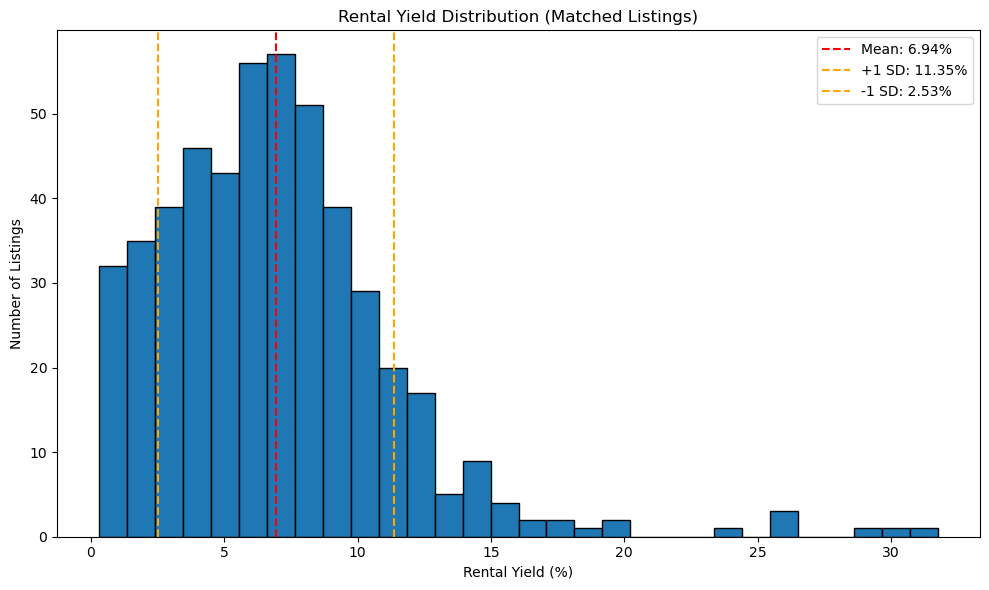

In [99]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['Rental Yield (%)'], bins=30, edgecolor='black')
plt.axvline(mean_yield, color='red', linestyle='--', label=f'Mean: {mean_yield:.2f}%')
plt.axvline(mean_yield + std_yield, color='orange', linestyle='--', label=f'+1 SD: {mean_yield + std_yield:.2f}%')
plt.axvline(mean_yield - std_yield, color='orange', linestyle='--', label=f'-1 SD: {mean_yield - std_yield:.2f}%')
plt.title('Rental Yield Distribution (Matched Listings)')
plt.xlabel('Rental Yield (%)')
plt.ylabel('Number of Listings')
plt.legend()
plt.tight_layout()
plt.show()

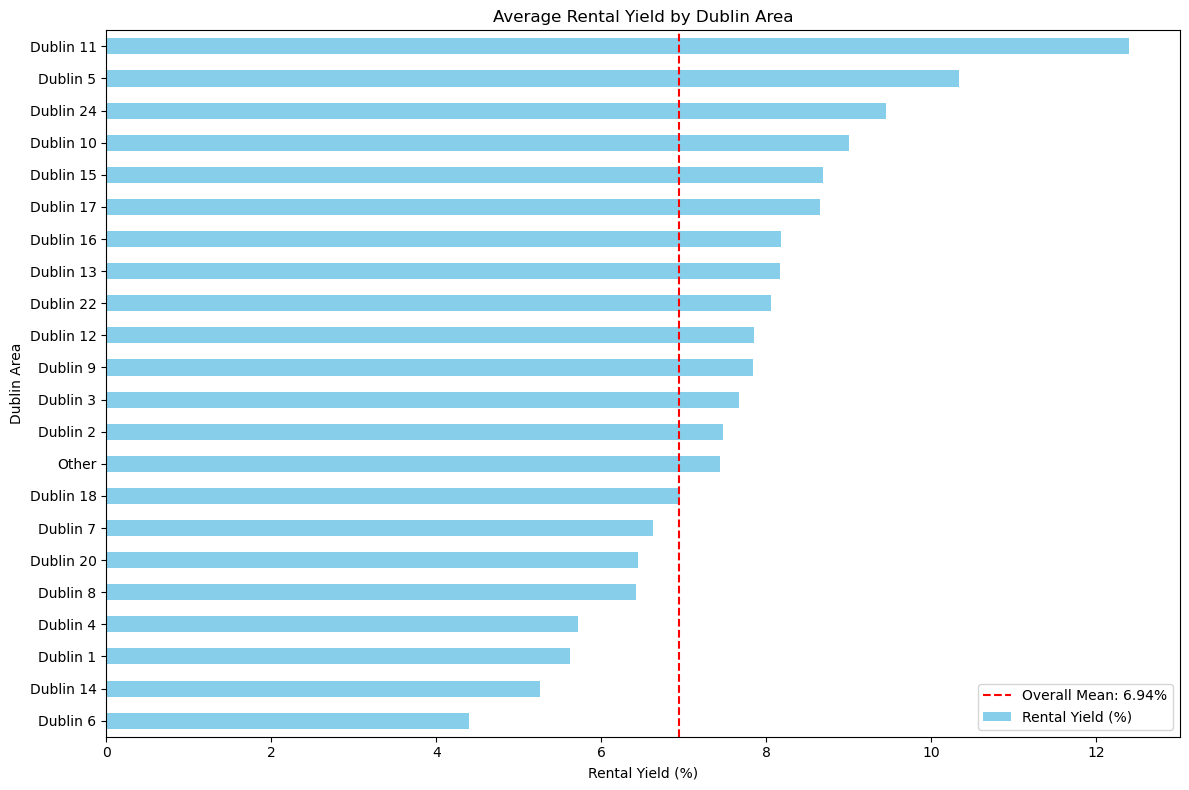

In [100]:
# Area average yield (from before)
area_yield = df_cleaned.groupby('Dublin Area')['Rental Yield (%)'].mean().sort_values()

plt.figure(figsize=(12, 8))
area_yield.plot(kind='barh', color='skyblue')
plt.axvline(mean_yield, color='red', linestyle='--', label=f'Overall Mean: {mean_yield:.2f}%')
plt.title('Average Rental Yield by Dublin Area')
plt.xlabel('Rental Yield (%)')
plt.ylabel('Dublin Area')
plt.legend()
plt.tight_layout()
plt.show()

In [101]:
print(df_cleaned['Rental Yield (%)'].describe())
print(df_cleaned[['Address', 'Price', 'Estimated Sale Price', 'Rental Yield (%)']].sort_values(by='Rental Yield (%)', ascending=False).head(10))

count    496.000000
mean       6.937893
std        4.407151
min        0.299122
25%        3.799367
50%        6.573784
75%        9.101613
max       31.764706
Name: Rental Yield (%), dtype: float64
                                             Address   Price  \
265    Flat 2, 86 Cabra Park, Phibsborough, Dublin 7  2250.0   
712                 Church Road, East Wall, Dublin 3  1686.0   
607     Virginia Park, Dublin 11, Finglas, Dublin 11  3650.0   
658                Mellowes Road, Finglas, Dublin 11  2231.0   
184  156 Brandon Road, Drimnagh, Drimnagh, Dublin 12  3000.0   
24           Flat 7, 4 North Circular Road, Dublin 7  1895.0   
761   Whitestown Crescent, Blanchardstown, Dublin 15  2451.0   
821                      16 Aungier Street, Dublin 2  1895.0   
557           Sandymount Green, Sandymount, Dublin 4  4200.0   
533                       55 Waterloo Road, Dublin 4  9950.0   

     Estimated Sale Price  Rental Yield (%)  
265                 85000         31.764706  
712 

In [102]:
df_cleaned.to_csv('daft_full_enhanced.csv', index=False)

In [103]:
ppr.to_csv('ppr_cleaned_dublin_only.csv', index=False)

# 🏠 Dublin Rental Fairness Intelligence Tool

**Author:** Lee Gallagher  
**Date:** July 8, 2025  
**Goal:** Help users evaluate the fairness of rental prices in Dublin using real market data

## ✅ What I’ve Done So Far:
- Scraped 1,200+ live rental listings from Daft.ie (Selenium)
- Cleaned data: price, address, bedrooms, bathrooms, BER, area code
- Built features:
  - % Above/Below Area Avg Rent (by bedrooms)
  - Matched listings to 2021–2024 PPR sale data using fuzzy matching
  - Calculated estimated sale value + rental yield
- Visualized:
  - Rental Yield distribution
  - Yield by Dublin area
  - Value insights per listing

## 🧠 Current Dataset:
- Cleaned
- Matched
- Ready for ML / Streamlit

## 🔜 Next Steps:
- Train a rent prediction model
- Build an interactive Streamlit dashboard
- Add location-based features (e.g., distance to DART or city centre)

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# Drop rows with missing price or estimated sale price
model_data = df_cleaned.dropna(subset=['Price', 'Estimated Sale Price'])

# Define target and features
X = model_data[[
    'Bedrooms', 'Bathrooms', 'Property Type', 'BER Rating', 'Dublin Area', 'Estimated Sale Price'
]]
y = model_data['Price']

In [105]:
# Define categorical and numeric features
cat_cols = ['Property Type', 'BER Rating', 'Dublin Area']
num_cols = ['Bedrooms', 'Bathrooms', 'Estimated Sale Price']

# Preprocessor
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('num', 'passthrough', num_cols)
])

# Pipeline
model = make_pipeline(preprocessor, RandomForestRegressor(n_estimators=100, random_state=42))

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

ValueError: For a sparse output, all columns should be a numeric or convertible to a numeric.

In [106]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📈 Mean Absolute Error: €{mae:.2f}")
print(f"📊 R² Score: {r2:.3f}")

ValueError: For a sparse output, all columns should be a numeric or convertible to a numeric.

In [107]:
# Filter target values to a more typical range (e.g., < €5,000/month)
df_model = df_cleaned[df_cleaned['Price'] < 5000]

In [108]:
X['Rental Yield'] = df_cleaned['Rental Yield (%)']

C:\Users\Lee\AppData\Local\Temp\ipykernel_2452\2118105528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Rental Yield'] = df_cleaned['Rental Yield (%)']


In [109]:
def yield_category(y):
    if y < 4:
        return 'Low'
    elif y < 7:
        return 'Medium'
    else:
        return 'High'

df_cleaned['Yield Category'] = df_cleaned['Rental Yield (%)'].apply(yield_category)

In [110]:
df_cleaned['Price per Bedroom'] = df_cleaned['Price'] / df_cleaned['Bedrooms']

TypeError: unsupported operand type(s) for /: 'float' and 'str'

In [113]:
df_model = pd.get_dummies(df_cleaned, columns=['Property Type', 'Dublin Area', 'Yield Category'], drop_first=True)

In [114]:
df_model['Beds_Baths_Combo'] = df_cleaned['Bedrooms'] * df_cleaned['Bathrooms']
df_model['Yield_Adjusted_PricePerRoom'] = df_cleaned['Price per Bedroom'] * df_cleaned['Rental Yield (%)']

TypeError: can't multiply sequence by non-int of type 'str'

In [115]:
df_model = df_model[
    (df_model['Price'] < 10000) &
    (df_model['Rental Yield (%)'] < 15) &
    (df_model['Bedrooms'] <= 6)
].copy()

TypeError: '<=' not supported between instances of 'str' and 'int'

In [116]:
import numpy as np
df_model['Log Price'] = np.log(df_model['Price'])

In [117]:
X = df_model.drop(columns=['Price', 'Log Price', 'Address', 'URL', 'Listing Summary', 'clean_address'], errors='ignore')
y = df_model['Log Price']  # or 'Price' if not using log transform

In [118]:
square_metres: float

In [119]:
import requests

def get_listing_details(ad_id):
    url = f"https://gateway.daft.ie/v3/listings/{ad_id}"
    headers = {
        "User-Agent": "Mozilla/5.0",
        "Referer": f"https://www.daft.ie/property-for-rent/{ad_id}",
        "Accept": "application/json",
    }
    r = requests.get(url, headers=headers)
    if r.ok:
        data = r.json().get('listing', {})
        return data.get('square_metres', None)
    else:
        print(f"❌ Failed for {ad_id}: {r.status_code}")
        return None

# Test the first 3 listings only
sample_ids = df_cleaned['URL'].str.extract(r'/(\d+)$')[0].dropna().astype(int).head(3)

for ad_id in sample_ids:
    sqm = get_listing_details(ad_id)
    print(f"Ad ID {ad_id}: {sqm} m²")

❌ Failed for 6182286: 404
Ad ID 6182286: None m²
❌ Failed for 6180331: 404
Ad ID 6180331: None m²
❌ Failed for 6192100: 404
Ad ID 6192100: None m²


In [ ]:
df_cleaned.to_csv("daft_full_enhanced.csv", index=False)
ppr.to_csv("ppr_cleaned.csv", index=False)